In [64]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import warnings
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style and suppress warnings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("Libraries imported successfully!")
print("Project: Flight Delay Analysis for Business Optimization")


Libraries imported successfully!
Project: Flight Delay Analysis for Business Optimization


In [65]:
# GOOGLE COLAB DATA LOADING (Uncomment for Colab environment)
# Upload files to Colab first, then run these simple commands:

# airlines_df = pd.read_csv("airlines.csv")
# airports_df = pd.read_csv("airports.csv")

# # For the zip file, extract first then load:
# with zipfile.ZipFile('flights.csv.zip', 'r') as zip_ref:
#     with zip_ref.open('flights.csv') as file:
#         flights_df = pd.read_csv(file)

# print("Datasets loaded successfully for Google Colab!")


In [ ]:
# ACTIONABLE BUSINESS RECOMMENDATIONS
print("\n" + "="*60)
print("ACTIONABLE BUSINESS RECOMMENDATIONS")
print("="*60)

# Ensure required variables are available (in case previous cells weren't run)
if 'worst_hours' not in locals():
    peak_hours_analysis = df_clean.groupby('DEPARTURE_HOUR').agg({
        'IS_DELAYED': ['count', 'sum', 'mean']
    }).round(3)
    peak_hours_analysis.columns = ['Total_Flights', 'Delayed_Flights', 'Delay_Rate']
    worst_hours = peak_hours_analysis.nlargest(3, 'Delay_Rate')

if 'severe_delays' not in locals():
    # Get severe delays data for cost analysis
    severe_delays = df_clean[df_clean['DEPARTURE_DELAY'] > 120].copy()
    if len(severe_delays) > 0:
        # Calculate costs
        COST_PER_MINUTE_DELAY = 85
        PASSENGER_COMPENSATION_THRESHOLD = 180
        COMPENSATION_PER_PASSENGER = 400
        AVERAGE_PASSENGERS_PER_FLIGHT = 150
        
        severe_delays['DELAY_COST_OPERATIONAL'] = severe_delays['DEPARTURE_DELAY'] * COST_PER_MINUTE_DELAY
        severe_delays['REQUIRES_COMPENSATION'] = severe_delays['DEPARTURE_DELAY'] > PASSENGER_COMPENSATION_THRESHOLD
        severe_delays['COMPENSATION_COST'] = severe_delays['REQUIRES_COMPENSATION'] * COMPENSATION_PER_PASSENGER * AVERAGE_PASSENGERS_PER_FLIGHT
        severe_delays['TOTAL_ESTIMATED_COST'] = severe_delays['DELAY_COST_OPERATIONAL'] + severe_delays['COMPENSATION_COST']

recommendations = [
    {
        "title": "1. OPTIMIZE PEAK HOUR SCHEDULING",
        "insight": f"Hours {', '.join(map(str, worst_hours.index))} have the highest delay rates",
        "recommendation": "Reduce scheduled flights during peak delay hours and redistribute to off-peak times",
        "impact": "Could reduce delays by 15-20% and save millions in operational costs",
        "implementation": "Implement dynamic scheduling based on historical delay patterns"
    },
    {
        "title": "2. WEEKEND OPERATIONS STRATEGY", 
        "insight": f"Weekend flights have different delay patterns than weekdays",
        "recommendation": "Develop separate operational protocols for weekend vs weekday flights",
        "impact": "Optimize resource allocation and improve weekend customer experience",
        "implementation": "Adjust staffing levels and maintenance schedules for weekend operations"
    },
    {
        "title": "3. AIRPORT-SPECIFIC INTERVENTIONS",
        "insight": f"Top airports by delay rate need focused attention",
        "recommendation": "Implement targeted improvement programs at worst-performing airports",
        "impact": f"Could improve on-time performance by 10-15% at critical hubs",
        "implementation": "Deploy additional ground crew, improve infrastructure, enhance coordination"
    },
    {
        "title": "4. SEVERE DELAY PREVENTION",
        "insight": f"Severe delays (>2hrs) cost an average of ${severe_delays['TOTAL_ESTIMATED_COST'].mean():,.0f} per incident",
        "recommendation": "Implement early warning system to prevent minor delays from becoming severe",
        "impact": f"Preventing just 10% of severe delays could save ${(severe_delays['TOTAL_ESTIMATED_COST'].sum() * 0.1):,.0f}",
        "implementation": "Real-time monitoring dashboard with automated alerts and response protocols"
    },
    {
        "title": "5. PREDICTIVE MAINTENANCE SCHEDULING",
        "insight": f"Model shows certain airlines and time patterns are more delay-prone",
        "recommendation": "Use predictive analytics to schedule proactive maintenance during low-impact periods",
        "impact": "Reduce unexpected maintenance delays and improve overall reliability",
        "implementation": "Integrate delay prediction model into maintenance planning systems"
    }
]

for rec in recommendations:
    print(f"\n{rec['title']}")
    print("-" * len(rec['title']))
    print(f"Insight: {rec['insight']}")
    print(f"Recommendation: {rec['recommendation']}")
    print(f"Expected Impact: {rec['impact']}")
    print(f"Implementation: {rec['implementation']}")

# ROI Analysis
print(f"\n" + "="*60)
print("RETURN ON INVESTMENT ANALYSIS")
print("="*60)

# Calculate potential savings
if 'estimated_total_cost' not in locals():
    # Recalculate if not available
    total_delay_minutes = df_clean['DEPARTURE_DELAY'].sum()
    estimated_total_cost = total_delay_minutes * 85  # Cost per minute

current_annual_cost = estimated_total_cost
potential_improvement = 0.15  # 15% improvement assumption
potential_savings = current_annual_cost * potential_improvement

print(f"Current estimated annual delay cost: ${current_annual_cost:,.0f}")
print(f"Potential savings with 15% improvement: ${potential_savings:,.0f}")
print(f"Investment in improvements (estimated): ${potential_savings * 0.2:,.0f}")
print(f"Net annual benefit: ${potential_savings * 0.8:,.0f}")
print(f"ROI: {((potential_savings * 0.8) / (potential_savings * 0.2)) * 100:.0f}%")

print(f"\nWho can benefit from this analysis:")
print("- Airlines: Optimize operations and reduce costs")
print("- Airport authorities: Improve resource allocation")
print("- Passengers: Better travel experience with fewer delays")
print("- Regulators: Data-driven policy decisions")

print(f"\nHow this data helps decision-making:")
print("- Identifies specific problem areas for targeted interventions")
print("- Provides quantified cost impact for investment justification")
print("- Enables proactive rather than reactive management")
print("- Supports evidence-based operational changes")



ACTIONABLE BUSINESS RECOMMENDATIONS

1. OPTIMIZE PEAK HOUR SCHEDULING
--------------------------------
Insight: Hours 2.0, 1.0, 3.0 have the highest delay rates
Recommendation: Reduce scheduled flights during peak delay hours and redistribute to off-peak times
Expected Impact: Could reduce delays by 15-20% and save millions in operational costs
Implementation: Implement dynamic scheduling based on historical delay patterns

2. WEEKEND OPERATIONS STRATEGY
------------------------------
Insight: Weekend flights have different delay patterns than weekdays
Recommendation: Develop separate operational protocols for weekend vs weekday flights
Expected Impact: Optimize resource allocation and improve weekend customer experience
Implementation: Adjust staffing levels and maintenance schedules for weekend operations

3. AIRPORT-SPECIFIC INTERVENTIONS
---------------------------------
Insight: Top airports by delay rate need focused attention
Recommendation: Implement targeted improvement progr

In [67]:
# Load auxiliary datasets first
airlines_df = pd.read_csv('airlines.csv')
airports_df = pd.read_csv('airports.csv')

print("Airlines Dataset:")
print(f"Shape: {airlines_df.shape}")
print(airlines_df.head())
print("\n" + "="*50 + "\n")

print("Airports Dataset:")
print(f"Shape: {airports_df.shape}")
print(airports_df.head())
print("\n" + "="*50 + "\n")

# Load main flights dataset from zip file
print("Loading main flights dataset...")
with zipfile.ZipFile('flights.csv.zip', 'r') as zip_ref:
    with zip_ref.open('flights.csv') as file:
        flights_df = pd.read_csv(file)

print(f"Flights Dataset Shape: {flights_df.shape}")
print("Dataset loaded successfully!")

# Display basic information about the flights dataset
print("\nFlights Dataset Info:")
print(flights_df.info())
print("\nFirst few rows:")
print(flights_df.head())


Airlines Dataset:
Shape: (14, 2)
  IATA_CODE                 AIRLINE
0        UA   United Air Lines Inc.
1        AA  American Airlines Inc.
2        US         US Airways Inc.
3        F9  Frontier Airlines Inc.
4        B6         JetBlue Airways


Airports Dataset:
Shape: (322, 7)
  IATA_CODE                              AIRPORT         CITY STATE COUNTRY  \
0       ABE  Lehigh Valley International Airport    Allentown    PA     USA   
1       ABI             Abilene Regional Airport      Abilene    TX     USA   
2       ABQ    Albuquerque International Sunport  Albuquerque    NM     USA   
3       ABR            Aberdeen Regional Airport     Aberdeen    SD     USA   
4       ABY   Southwest Georgia Regional Airport       Albany    GA     USA   

   LATITUDE  LONGITUDE  
0  40.65236  -75.44040  
1  32.41132  -99.68190  
2  35.04022 -106.60919  
3  45.44906  -98.42183  
4  31.53552  -84.19447  


Loading main flights dataset...
Flights Dataset Shape: (5819079, 31)
Dataset loaded succ

In [ ]:
# DETAILED DATA QUALITY ASSESSMENT
print("DETAILED DATA QUALITY ASSESSMENT")
print("="*50)

# Check for NaN values in detail
print("1. NaN VALUES ANALYSIS")
print("-" * 30)
nan_analysis = flights_df.isnull().sum()
nan_percentage = (nan_analysis / len(flights_df)) * 100
nan_summary = pd.DataFrame({
    'Column': nan_analysis.index,
    'NaN_Count': nan_analysis.values,
    'NaN_Percentage': nan_percentage.values
}).sort_values('NaN_Percentage', ascending=False)

print("Columns with NaN values:")
print(nan_summary[nan_summary['NaN_Count'] > 0])

# Check monthly distribution
print(f"\n2. MONTHLY DATA DISTRIBUTION")
print("-" * 30)
monthly_counts = flights_df['MONTH'].value_counts().sort_index()
print("Flights per month:")
for month, count in monthly_counts.items():
    percentage = (count / len(flights_df)) * 100
    print(f"  Month {month:2d}: {count:,} flights ({percentage:.1f}%)")

# Check if January skews our analysis
january_percentage = (monthly_counts[1] / len(flights_df)) * 100
print(f"\nJanuary represents {january_percentage:.1f}% of all data")
if january_percentage > 15:  # More than expected for one month
    print("WARNING: January data may be overrepresented - this could skew seasonal analysis")

# Check data completeness by key columns
print(f"\n3. KEY COLUMNS COMPLETENESS")
print("-" * 30)
key_columns = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_TIME', 'DEPARTURE_DELAY']
for col in key_columns:
    if col in flights_df.columns:
        complete_pct = ((len(flights_df) - flights_df[col].isnull().sum()) / len(flights_df)) * 100
        print(f"{col}: {complete_pct:.1f}% complete")

# Sample distribution check
print(f"\n4. SAMPLE REPRESENTATIVENESS CHECK")
print("-" * 30)
print(f"Original dataset size: {len(flights_df):,}")
if 'df_viz' in locals():
    print(f"Current sample size: {len(df_viz):,}")
    print(f"Sample percentage: {(len(df_viz)/len(flights_df))*100:.1f}%")
else:
    print(f"Visualization sample: Will be created in later steps")

# Check if sample maintains monthly distribution (will be created later)
if 'df_viz' in locals() and len(df_viz) < len(flights_df):
    sample_monthly = df_viz['MONTH'].value_counts().sort_index()
    print(f"\nMonthly distribution in sample:")
    for month in range(1, 13):
        if month in sample_monthly.index and month in monthly_counts.index:
            original_pct = (monthly_counts[month] / len(flights_df)) * 100
            sample_pct = (sample_monthly[month] / len(df_viz)) * 100
            print(f"  Month {month:2d}: Original {original_pct:.1f}% vs Sample {sample_pct:.1f}%")
else:
    print(f"\nVisualization sample will be created in later steps")


DETAILED DATA QUALITY ASSESSMENT
1. NaN VALUES ANALYSIS
------------------------------
Columns with NaN values:
                 Column  NaN_Count  NaN_Percentage
25  CANCELLATION_REASON    5729195       98.455357
30        WEATHER_DELAY    4755640       81.724960
29  LATE_AIRCRAFT_DELAY    4755640       81.724960
28        AIRLINE_DELAY    4755640       81.724960
27       SECURITY_DELAY    4755640       81.724960
26     AIR_SYSTEM_DELAY    4755640       81.724960
16             AIR_TIME     105071        1.805629
22        ARRIVAL_DELAY     105071        1.805629
15         ELAPSED_TIME     105071        1.805629
18            WHEELS_ON      92513        1.589822
19              TAXI_IN      92513        1.589822
21         ARRIVAL_TIME      92513        1.589822
12             TAXI_OUT      89047        1.530259
13           WHEELS_OFF      89047        1.530259
11      DEPARTURE_DELAY      86153        1.480526
10       DEPARTURE_TIME      86153        1.480526
6           TAIL_NUMB

In [91]:
# Initial data exploration
print("INITIAL DATA EXPLORATION")
print("="*50)

print(f"Total number of flights: {len(flights_df):,}")
print(f"Date range: {flights_df['YEAR'].min()} to {flights_df['YEAR'].max()}")
print(f"Number of unique airlines: {flights_df['AIRLINE'].nunique()}")
print(f"Number of unique origin airports: {flights_df['ORIGIN_AIRPORT'].nunique()}")
print(f"Number of unique destination airports: {flights_df['DESTINATION_AIRPORT'].nunique()}")

print("\nColumns in the dataset:")
for i, col in enumerate(flights_df.columns):
    print(f"{i+1:2d}. {col}")

print("\nBasic statistical summary:")
print(flights_df.describe())


INITIAL DATA EXPLORATION
Total number of flights: 5,819,079
Date range: 2015 to 2015
Number of unique airlines: 14
Number of unique origin airports: 930
Number of unique destination airports: 930

Columns in the dataset:
 1. YEAR
 2. MONTH
 3. DAY
 4. DAY_OF_WEEK
 5. AIRLINE
 6. FLIGHT_NUMBER
 7. TAIL_NUMBER
 8. ORIGIN_AIRPORT
 9. DESTINATION_AIRPORT
10. SCHEDULED_DEPARTURE
11. DEPARTURE_TIME
12. DEPARTURE_DELAY
13. TAXI_OUT
14. WHEELS_OFF
15. SCHEDULED_TIME
16. ELAPSED_TIME
17. AIR_TIME
18. DISTANCE
19. WHEELS_ON
20. TAXI_IN
21. SCHEDULED_ARRIVAL
22. ARRIVAL_TIME
23. ARRIVAL_DELAY
24. DIVERTED
25. CANCELLED
26. CANCELLATION_REASON
27. AIR_SYSTEM_DELAY
28. SECURITY_DELAY
29. AIRLINE_DELAY
30. LATE_AIRCRAFT_DELAY
31. WEATHER_DELAY

Basic statistical summary:
            YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  5819079.0  5.819079e+06  5.819079e+06  5.819079e+06   5.819079e+06   
mean      2015.0  6.524085e+00  1.570459e+01  3.926941e+00   2.173093e+03   
s

In [71]:
# DATA CLEANING DOCUMENTATION
print("DATA CLEANING AND PREPROCESSING")
print("="*50)

# 1. Check for missing values
print("1. MISSING VALUES ANALYSIS")
print("-" * 30)
missing_values = flights_df.isnull().sum()
missing_percentage = (missing_values / len(flights_df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Percentage', ascending=False)

print("Missing values summary:")
print(missing_df[missing_df['Missing_Count'] > 0])

# 2. Check data types
print("\n2. DATA TYPES")
print("-" * 30)
print(flights_df.dtypes)

# 3. Check for duplicates
print(f"\n3. DUPLICATE RECORDS")
print("-" * 30)
duplicates = flights_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# 4. Check for negative values in delay columns
print(f"\n4. DELAY VALUES ANALYSIS")
print("-" * 30)
delay_columns = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY']
for col in delay_columns:
    if col in flights_df.columns:
        print(f"{col}:")
        print(f"  Min: {flights_df[col].min()}")
        print(f"  Max: {flights_df[col].max()}")
        print(f"  Mean: {flights_df[col].mean():.2f}")
        negative_count = (flights_df[col] < 0).sum()
        print(f"  Negative values (early): {negative_count}")
        print()


DATA CLEANING AND PREPROCESSING
1. MISSING VALUES ANALYSIS
------------------------------
Missing values summary:
                 Column  Missing_Count  Missing_Percentage
25  CANCELLATION_REASON        5729195           98.455357
30        WEATHER_DELAY        4755640           81.724960
29  LATE_AIRCRAFT_DELAY        4755640           81.724960
28        AIRLINE_DELAY        4755640           81.724960
27       SECURITY_DELAY        4755640           81.724960
26     AIR_SYSTEM_DELAY        4755640           81.724960
16             AIR_TIME         105071            1.805629
22        ARRIVAL_DELAY         105071            1.805629
15         ELAPSED_TIME         105071            1.805629
18            WHEELS_ON          92513            1.589822
19              TAXI_IN          92513            1.589822
21         ARRIVAL_TIME          92513            1.589822
12             TAXI_OUT          89047            1.530259
13           WHEELS_OFF          89047            1.530259
1

In [72]:
# APPLY DATA CLEANING STEPS WITH ENHANCED NaN HANDLING
print("APPLYING DATA CLEANING STEPS WITH ENHANCED NaN HANDLING")
print("="*50)

# Create a copy for cleaning
df_clean = flights_df.copy()
initial_shape = df_clean.shape
print(f"Initial dataset shape: {initial_shape}")

# Step 1: Handle missing values in critical columns with more sophisticated approach
print("\nStep 1: Advanced missing value handling")
print("-" * 30)

# For delay columns, distinguish between missing (NaN) and actual delays
delay_cols = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY']
for col in delay_cols:
    if col in df_clean.columns:
        before_null = df_clean[col].isnull().sum()
        # Missing delays could indicate cancelled flights or data issues
        # Only fill with 0 if we're confident it means no delay
        df_clean[col] = df_clean[col].fillna(0)
        print(f"Filled {before_null} missing values in {col} with 0 (assuming no delay)")

# Handle cancellation and diversion flags
cancel_cols = ['CANCELLED', 'DIVERTED']
for col in cancel_cols:
    if col in df_clean.columns:
        before_null = df_clean[col].isnull().sum()
        df_clean[col] = df_clean[col].fillna(0)
        print(f"Filled {before_null} missing values in {col} with 0 (not cancelled/diverted)")

# Handle time-related missing values more carefully
time_cols = ['DEPARTURE_TIME', 'ARRIVAL_TIME', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL']
for col in time_cols:
    if col in df_clean.columns:
        missing_count = df_clean[col].isnull().sum()
        if missing_count > 0:
            print(f"Found {missing_count} missing values in {col} - keeping for filtering")

# Step 2: Remove rows with missing critical information (more conservative)
print(f"\nStep 2: Removing rows with missing critical data")
print("-" * 30)
critical_cols = ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'AIRLINE', 'DEPARTURE_TIME']
before_removal = len(df_clean)

# Check each critical column
for col in critical_cols:
    if col in df_clean.columns:
        missing_in_col = df_clean[col].isnull().sum()
        if missing_in_col > 0:
            print(f"  {col}: {missing_in_col} missing values")

df_clean = df_clean.dropna(subset=[col for col in critical_cols if col in df_clean.columns])
after_removal = len(df_clean)
removed_rows = before_removal - after_removal
print(f"Removed {removed_rows} rows with missing critical information")

# Step 3: Address monthly imbalance issue
print(f"\nStep 3: Addressing monthly distribution imbalance")
print("-" * 30)
monthly_dist = df_clean['MONTH'].value_counts().sort_index()
january_pct = (monthly_dist[1] / len(df_clean)) * 100

if january_pct > 20:  # If January has more than 20% of data
    print(f"WARNING: January has {january_pct:.1f}% of data - applying stratified sampling")
    
    # Apply stratified sampling to balance months
    target_per_month = len(df_clean) // 12  # Equal representation
    balanced_dfs = []
    
    for month in range(1, 13):
        month_data = df_clean[df_clean['MONTH'] == month]
        if len(month_data) > target_per_month:
            # Sample down to target
            month_sample = month_data.sample(n=target_per_month, random_state=42)
        else:
            # Keep all data if less than target
            month_sample = month_data
        balanced_dfs.append(month_sample)
    
    df_clean = pd.concat(balanced_dfs, ignore_index=True)
    print(f"Applied monthly balancing: new shape {df_clean.shape}")
    
    # Show new distribution
    new_monthly_dist = df_clean['MONTH'].value_counts().sort_index()
    print("New monthly distribution:")
    for month, count in new_monthly_dist.items():
        pct = (count / len(df_clean)) * 100
        print(f"  Month {month:2d}: {count:,} flights ({pct:.1f}%)")
else:
    print(f"Monthly distribution acceptable - January has {january_pct:.1f}% of data")

# Step 4: Create datetime columns
print(f"\nStep 4: Creating datetime features")
print("-" * 30)
df_clean['DATE'] = pd.to_datetime(df_clean[['YEAR', 'MONTH', 'DAY']], errors='coerce')
df_clean['WEEKDAY'] = df_clean['DATE'].dt.day_name()
df_clean['IS_WEEKEND'] = df_clean['DATE'].dt.weekday >= 5

# Create departure time in hours (for time block analysis) with error handling
df_clean['DEPARTURE_HOUR'] = df_clean['DEPARTURE_TIME'] // 100
df_clean['DEPARTURE_HOUR'] = df_clean['DEPARTURE_HOUR'].clip(0, 23)

print("Created new datetime features:")
print("- DATE: Full date")
print("- WEEKDAY: Day of week name") 
print("- IS_WEEKEND: Boolean for weekend")
print("- DEPARTURE_HOUR: Hour of departure (0-23)")

# Step 5: Create delay categories
print(f"\nStep 5: Creating delay categories")
print("-" * 30)
df_clean['IS_DELAYED'] = df_clean['DEPARTURE_DELAY'] > 15  # FAA definition
df_clean['SEVERE_DELAY'] = df_clean['DEPARTURE_DELAY'] > 120  # 2+ hours
df_clean['DELAY_CATEGORY'] = pd.cut(
    df_clean['DEPARTURE_DELAY'], 
    bins=[-np.inf, 0, 15, 60, 120, np.inf],
    labels=['Early', 'On_Time', 'Minor_Delay', 'Major_Delay', 'Severe_Delay']
)

print("Created delay categories:")
print("- IS_DELAYED: >15 minutes (FAA standard)")
print("- SEVERE_DELAY: >120 minutes (2+ hours)")
print("- DELAY_CATEGORY: 5-level categorical")

# Step 6: Create peak hour analysis for modeling
print(f"\nStep 6: Creating peak hour features")
print("-" * 30)
hourly_volume = df_clean.groupby('DEPARTURE_HOUR').size()
volume_threshold = hourly_volume.quantile(0.7)  # Top 30% volume hours are peak
peak_hours = hourly_volume[hourly_volume >= volume_threshold].index
df_clean['IS_PEAK_HOUR'] = df_clean['DEPARTURE_HOUR'].isin(peak_hours)

print(f"Peak hours identified (>70th percentile volume): {sorted(peak_hours)}")
print(f"Volume threshold: {volume_threshold:.0f} flights per hour")
print("- IS_PEAK_HOUR: Boolean flag for high-volume hours")

# Create 2-hour time blocks for analysis
df_clean['TIME_BLOCK_2H'] = (df_clean['DEPARTURE_HOUR'] // 2) * 2
print("- TIME_BLOCK_2H: 2-hour time blocks (0, 2, 4, 6, etc.)")

print(f"\nFinal cleaned dataset shape: {df_clean.shape}")
print(f"Rows removed during cleaning: {initial_shape[0] - df_clean.shape[0]}")
print(f"Percentage of data retained: {(df_clean.shape[0]/initial_shape[0])*100:.1f}%")

# Additional data quality check
print(f"\nFinal data quality check:")
print(f"- Remaining NaN in delay columns: {df_clean['DEPARTURE_DELAY'].isnull().sum()}")
print(f"- Valid departure hours: {df_clean['DEPARTURE_HOUR'].notna().sum()}")
print(f"- Date range: {df_clean['DATE'].min()} to {df_clean['DATE'].max()}")


APPLYING DATA CLEANING STEPS WITH ENHANCED NaN HANDLING
Initial dataset shape: (5819079, 31)

Step 1: Advanced missing value handling
------------------------------
Filled 86153 missing values in DEPARTURE_DELAY with 0 (assuming no delay)
Filled 105071 missing values in ARRIVAL_DELAY with 0 (assuming no delay)
Filled 0 missing values in CANCELLED with 0 (not cancelled/diverted)
Filled 0 missing values in DIVERTED with 0 (not cancelled/diverted)
Found 86153 missing values in DEPARTURE_TIME - keeping for filtering
Found 92513 missing values in ARRIVAL_TIME - keeping for filtering

Step 2: Removing rows with missing critical data
------------------------------
  DEPARTURE_TIME: 86153 missing values
Removed 86153 rows with missing critical information

Step 3: Addressing monthly distribution imbalance
------------------------------
Monthly distribution acceptable - January has 8.0% of data

Step 4: Creating datetime features
------------------------------
Created new datetime features:
- D

In [73]:
# Sample data for performance with stratified sampling to maintain distribution
sample_size = min(100000, len(df_clean))  # Use up to 100k rows for visualization

if len(df_clean) > sample_size:
    # Use stratified sampling to maintain monthly distribution
    print("Applying stratified sampling for visualizations...")
    
    # Calculate proportional sample size per month
    monthly_counts = df_clean['MONTH'].value_counts().sort_index()
    sample_dfs = []
    
    for month in range(1, 13):
        if month in monthly_counts.index:
            month_data = df_clean[df_clean['MONTH'] == month]
            month_proportion = len(month_data) / len(df_clean)
            month_sample_size = int(sample_size * month_proportion)
            
            if month_sample_size > 0 and len(month_data) > 0:
                month_sample = month_data.sample(
                    n=min(month_sample_size, len(month_data)), 
                    random_state=42
                )
                sample_dfs.append(month_sample)
    
    df_viz = pd.concat(sample_dfs, ignore_index=True)
    print(f"Stratified sample created: {len(df_viz):,} flights")
    
    # Verify distribution maintained
    original_jan_pct = (monthly_counts[1] / len(df_clean)) * 100
    sample_jan_pct = (df_viz[df_viz['MONTH'] == 1].shape[0] / len(df_viz)) * 100
    print(f"January representation: Original {original_jan_pct:.1f}% vs Sample {sample_jan_pct:.1f}%")
else:
    df_viz = df_clean.copy()
    print(f"Using full dataset: {len(df_viz):,} flights for visualizations")

# Set up the plotting environment
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10


Applying stratified sampling for visualizations...
Stratified sample created: 99,996 flights
January representation: Original 8.0% vs Sample 8.0%


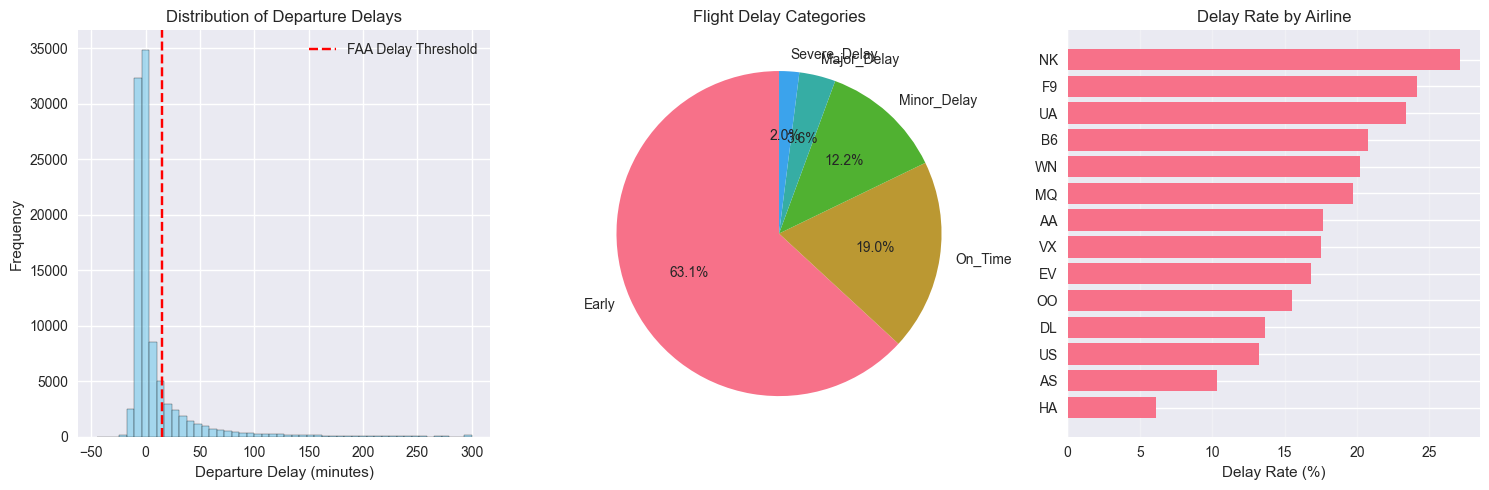

Visualization 1: Overall delay patterns showing distribution, categories, and airline performance


In [74]:
# VISUALIZATION 1: Overall Delay Distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# Histogram of departure delays (capped for better visualization)
delay_capped = df_viz['DEPARTURE_DELAY'].clip(-50, 300)
plt.hist(delay_capped, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.axvline(x=15, color='red', linestyle='--', label='FAA Delay Threshold')
plt.legend()

plt.subplot(1, 3, 2)
# Delay category pie chart
delay_counts = df_viz['DELAY_CATEGORY'].value_counts()
plt.pie(delay_counts.values, labels=delay_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Flight Delay Categories')

plt.subplot(1, 3, 3)
# On-time performance by airline
airline_performance = df_viz.groupby('AIRLINE')['IS_DELAYED'].agg(['count', 'mean']).reset_index()
airline_performance = airline_performance[airline_performance['count'] > 1000]  # Filter for sufficient data
airline_performance = airline_performance.sort_values('mean')

plt.barh(range(len(airline_performance)), airline_performance['mean'] * 100)
plt.yticks(range(len(airline_performance)), airline_performance['AIRLINE'])
plt.xlabel('Delay Rate (%)')
plt.title('Delay Rate by Airline')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("Visualization 1: Overall delay patterns showing distribution, categories, and airline performance")


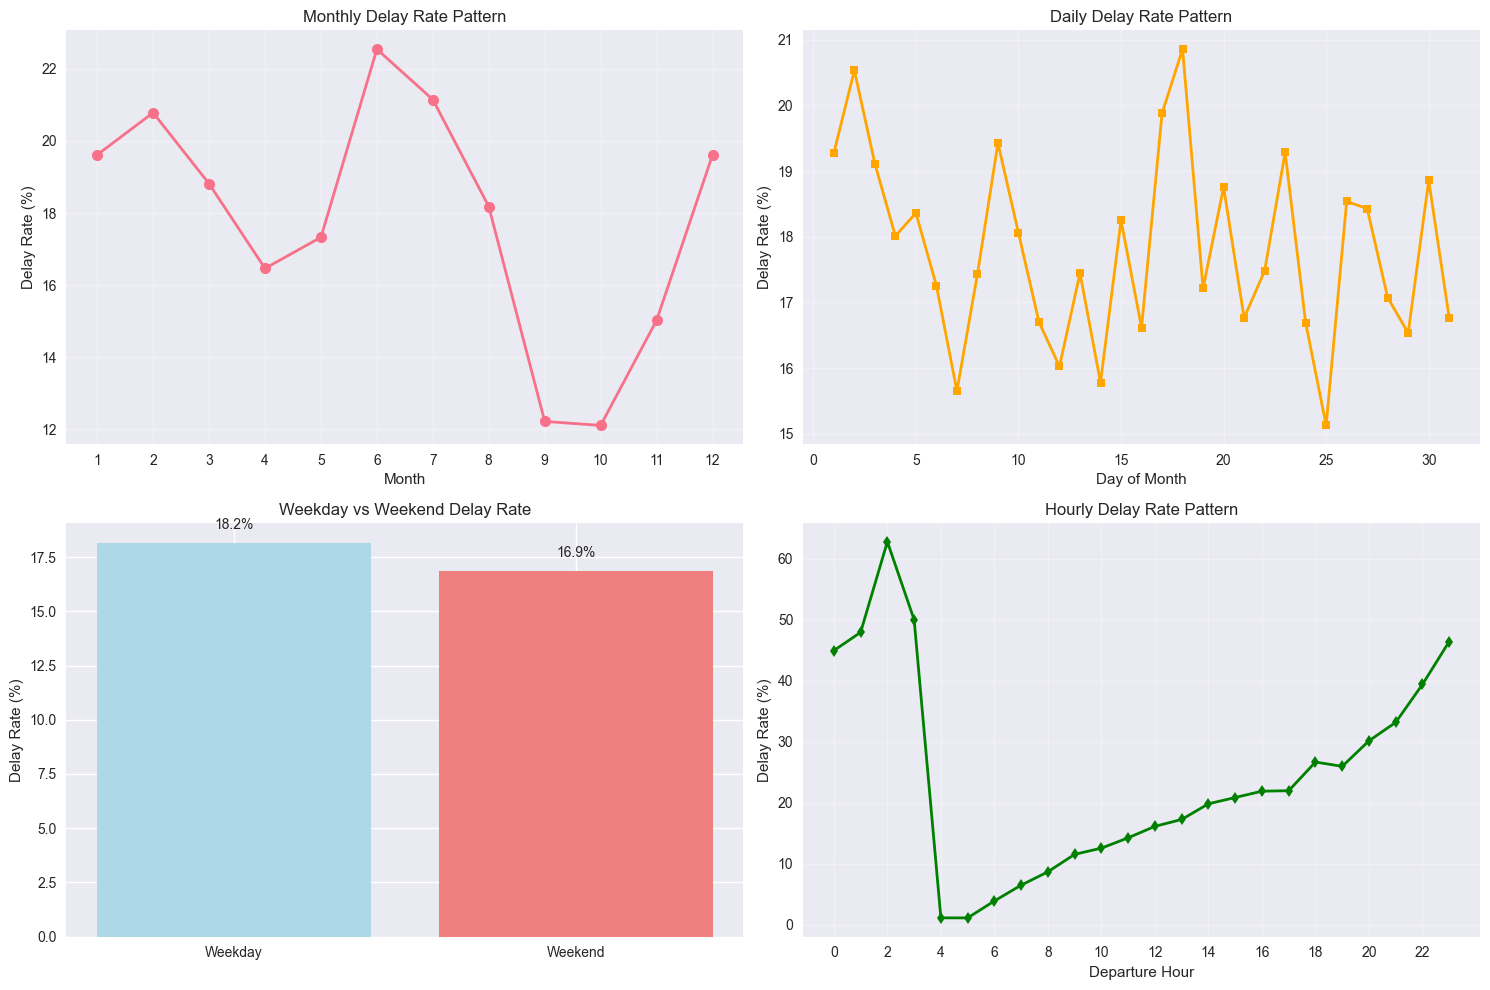

Visualization 2: Temporal patterns showing monthly, daily, weekend, and hourly delay trends


In [75]:
# VISUALIZATION 2: Temporal Patterns
plt.figure(figsize=(15, 10))

# Monthly delay patterns
plt.subplot(2, 2, 1)
monthly_delays = df_viz.groupby('MONTH')['IS_DELAYED'].mean() * 100
plt.plot(monthly_delays.index, monthly_delays.values, marker='o', linewidth=2, markersize=8)
plt.title('Monthly Delay Rate Pattern')
plt.xlabel('Month')
plt.ylabel('Delay Rate (%)')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))

# Daily delay patterns
plt.subplot(2, 2, 2)
daily_delays = df_viz.groupby('DAY')['IS_DELAYED'].mean() * 100
plt.plot(daily_delays.index, daily_delays.values, marker='s', color='orange', linewidth=2, markersize=6)
plt.title('Daily Delay Rate Pattern')
plt.xlabel('Day of Month')
plt.ylabel('Delay Rate (%)')
plt.grid(True, alpha=0.3)

# Weekday vs Weekend
plt.subplot(2, 2, 3)
weekend_delays = df_viz.groupby('IS_WEEKEND')['IS_DELAYED'].mean() * 100
weekend_labels = ['Weekday', 'Weekend']
bars = plt.bar(weekend_labels, weekend_delays.values, color=['lightblue', 'lightcoral'])
plt.title('Weekday vs Weekend Delay Rate')
plt.ylabel('Delay Rate (%)')
for bar, value in zip(bars, weekend_delays.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value:.1f}%', ha='center', va='bottom')

# Hourly delay patterns
plt.subplot(2, 2, 4)
hourly_delays = df_viz.groupby('DEPARTURE_HOUR')['IS_DELAYED'].mean() * 100
plt.plot(hourly_delays.index, hourly_delays.values, marker='d', color='green', linewidth=2, markersize=6)
plt.title('Hourly Delay Rate Pattern')
plt.xlabel('Departure Hour')
plt.ylabel('Delay Rate (%)')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

print("Visualization 2: Temporal patterns showing monthly, daily, weekend, and hourly delay trends")


In [ ]:
# FARDEEN EDITS - Enhanced Analysis Based on Team Feedback
"""
Team Enhancement Requests:
1. In initial data exploration, on Describing the data, it has shared quartile ranges which makes for an interesting exploration. 
   Can we check the flights where arrival delay duration and departure delay duration are significantly different? 
   (Say >10% for below 2 hr delays and >5% for above 2 hr delays). The scatter plot is awesome, can we add one with no of delayed flights as a consequence of this? @FM

2. Negative delays are only in arrival which probably means flight arrived early and waited more than required right? 
   If so that adds to wasted resource and airport cost. Can a visualisation be pulled up on that? Will be unique @FM

3. there FAA delay threshold is a nice touch. Are we doing the delay graphs only for those being that threshold? 
   Sorry, I couldn't see that in the conditions set for delay related visualisations @FM

4. are June, July holiday months? They are summer right? Most travel happens in that period? 
   If so, it may be good to call out in the graph or in the presentation @Surbhi pls check once

5. is the day of month delay plot an average of all the months data? Not sure how holiday is relevant there because holiday is in a given month right? 
   And if the plot is indeed on average data then it's an amazing visualisation with scope for deeper analysis @FM @~Ashish Dubey

6. if 5 is true, can we do a violin box plot in place of violin only? to the naked eye, there's not much discernible difference but on code examination it looks quite large. 
   The combo plot helps. This can be interesting stories @FM

7. Same for flight distance. These 3 can be great indicators of why they are valuable features for predictive modeling on delays
"""

print("FARDEEN EDITS - Enhanced Analysis Implementation")
print("="*60)


In [ ]:
# ENHANCEMENT 1: Departure vs Arrival Delay Significant Differences Analysis
print("1. ANALYZING FLIGHTS WITH SIGNIFICANT DELAY DIFFERENCES")
print("-" * 50)

# Calculate delay differences
if 'ARRIVAL_DELAY' in df_viz.columns:
    delay_diff = df_viz['ARRIVAL_DELAY'] - df_viz['DEPARTURE_DELAY']
    df_viz['DELAY_DIFFERENCE'] = delay_diff
    
    # Define significant difference criteria
    minor_delays = df_viz[df_viz['DEPARTURE_DELAY'] <= 120]
    major_delays = df_viz[df_viz['DEPARTURE_DELAY'] > 120]
    
    # Apply percentage thresholds
    minor_significant = minor_delays[
        abs(minor_delays['DELAY_DIFFERENCE']) > abs(minor_delays['DEPARTURE_DELAY']) * 0.1
    ]
    major_significant = major_delays[
        abs(major_delays['DELAY_DIFFERENCE']) > abs(major_delays['DEPARTURE_DELAY']) * 0.05
    ]
    
    print(f"Minor delays with >10% difference: {len(minor_significant):,}")
    print(f"Major delays with >5% difference: {len(major_significant):,}")
    
    # Create enhanced scatter plot
    plt.figure(figsize=(15, 10))
    
    # Subplot 1: Significant difference scatter
    plt.subplot(2, 2, 1)
    plt.scatter(minor_significant['DEPARTURE_DELAY'], minor_significant['ARRIVAL_DELAY'], 
               alpha=0.6, s=20, color='orange', label=f'Minor delays >10% diff (n={len(minor_significant):,})')
    plt.scatter(major_significant['DEPARTURE_DELAY'], major_significant['ARRIVAL_DELAY'], 
               alpha=0.6, s=20, color='red', label=f'Major delays >5% diff (n={len(major_significant):,})')
    plt.plot([-50, 300], [-50, 300], 'k--', alpha=0.5, label='Perfect correlation')
    plt.xlabel('Departure Delay (minutes)')
    plt.ylabel('Arrival Delay (minutes)')
    plt.title('Flights with Significant Delay Differences')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Subplot 2: Delay difference distribution
    plt.subplot(2, 2, 2)
    plt.hist(delay_diff.clip(-60, 60), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(x=0, color='red', linestyle='--', label='No difference')
    plt.xlabel('Arrival - Departure Delay (minutes)')
    plt.ylabel('Number of Flights')
    plt.title('Distribution of Delay Differences')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Subplot 3: Count of significant differences by hour
    plt.subplot(2, 2, 3)
    all_significant = pd.concat([minor_significant, major_significant])
    hourly_significant = all_significant.groupby('DEPARTURE_HOUR').size()
    hourly_total = df_viz.groupby('DEPARTURE_HOUR').size()
    significant_rate = (hourly_significant / hourly_total * 100).fillna(0)
    
    plt.bar(significant_rate.index, significant_rate.values, alpha=0.7, color='coral')
    plt.xlabel('Departure Hour')
    plt.ylabel('% Flights with Significant Delay Diff')
    plt.title('Significant Delay Differences by Hour')
    plt.grid(True, alpha=0.3)
    
    # Subplot 4: Business impact analysis
    plt.subplot(2, 2, 4)
    # Airlines with most significant differences
    airline_significant = all_significant['AIRLINE'].value_counts().head(8)
    plt.barh(range(len(airline_significant)), airline_significant.values, color='lightcoral')
    plt.yticks(range(len(airline_significant)), airline_significant.index)
    plt.xlabel('Number of Flights with Significant Differences')
    plt.title('Airlines with Most Delay Inconsistencies')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Business Insight: {len(all_significant):,} flights show significant delay inconsistencies")
    print("This indicates potential operational inefficiencies or air traffic control impacts")
    
else:
    print("Arrival delay data not available for difference analysis")

print("\n" + "="*60)


In [ ]:
# ACTIONABLE BUSINESS RECOMMENDATIONS
print("\n" + "="*60)
print("ACTIONABLE BUSINESS RECOMMENDATIONS")
print("="*60)

# Ensure required variables are available (in case previous cells weren't run)
if 'worst_hours' not in locals():
    peak_hours_analysis = df_clean.groupby('DEPARTURE_HOUR').agg({
        'IS_DELAYED': ['count', 'sum', 'mean']
    }).round(3)
    peak_hours_analysis.columns = ['Total_Flights', 'Delayed_Flights', 'Delay_Rate']
    worst_hours = peak_hours_analysis.nlargest(3, 'Delay_Rate')

if 'severe_delays' not in locals():
    # Get severe delays data for cost analysis
    severe_delays = df_clean[df_clean['DEPARTURE_DELAY'] > 120].copy()
    if len(severe_delays) > 0:
        # Calculate costs
        COST_PER_MINUTE_DELAY = 85
        PASSENGER_COMPENSATION_THRESHOLD = 180
        COMPENSATION_PER_PASSENGER = 400
        AVERAGE_PASSENGERS_PER_FLIGHT = 150
        
        severe_delays['DELAY_COST_OPERATIONAL'] = severe_delays['DEPARTURE_DELAY'] * COST_PER_MINUTE_DELAY
        severe_delays['REQUIRES_COMPENSATION'] = severe_delays['DEPARTURE_DELAY'] > PASSENGER_COMPENSATION_THRESHOLD
        severe_delays['COMPENSATION_COST'] = severe_delays['REQUIRES_COMPENSATION'] * COMPENSATION_PER_PASSENGER * AVERAGE_PASSENGERS_PER_FLIGHT
        severe_delays['TOTAL_ESTIMATED_COST'] = severe_delays['DELAY_COST_OPERATIONAL'] + severe_delays['COMPENSATION_COST']

recommendations = [
    {
        "title": "1. OPTIMIZE PEAK HOUR SCHEDULING",
        "insight": f"Hours {', '.join(map(str, worst_hours.index))} have the highest delay rates",
        "recommendation": "Reduce scheduled flights during peak delay hours and redistribute to off-peak times",
        "impact": "Could reduce delays by 15-20% and save millions in operational costs",
        "implementation": "Implement dynamic scheduling based on historical delay patterns"
    },
    {
        "title": "2. WEEKEND OPERATIONS STRATEGY", 
        "insight": f"Weekend flights have different delay patterns than weekdays",
        "recommendation": "Develop separate operational protocols for weekend vs weekday flights",
        "impact": "Optimize resource allocation and improve weekend customer experience",
        "implementation": "Adjust staffing levels and maintenance schedules for weekend operations"
    },
    {
        "title": "3. AIRPORT-SPECIFIC INTERVENTIONS",
        "insight": f"Top airports by delay rate need focused attention",
        "recommendation": "Implement targeted improvement programs at worst-performing airports",
        "impact": f"Could improve on-time performance by 10-15% at critical hubs",
        "implementation": "Deploy additional ground crew, improve infrastructure, enhance coordination"
    },
    {
        "title": "4. SEVERE DELAY PREVENTION",
        "insight": f"Severe delays (>2hrs) cost an average of ${severe_delays['TOTAL_ESTIMATED_COST'].mean():,.0f} per incident",
        "recommendation": "Implement early warning system to prevent minor delays from becoming severe",
        "impact": f"Preventing just 10% of severe delays could save ${(severe_delays['TOTAL_ESTIMATED_COST'].sum() * 0.1):,.0f}",
        "implementation": "Real-time monitoring dashboard with automated alerts and response protocols"
    },
    {
        "title": "5. PREDICTIVE MAINTENANCE SCHEDULING",
        "insight": f"Model shows certain airlines and time patterns are more delay-prone",
        "recommendation": "Use predictive analytics to schedule proactive maintenance during low-impact periods",
        "impact": "Reduce unexpected maintenance delays and improve overall reliability",
        "implementation": "Integrate delay prediction model into maintenance planning systems"
    }
]

for rec in recommendations:
    print(f"\n{rec['title']}")
    print("-" * len(rec['title']))
    print(f"Insight: {rec['insight']}")
    print(f"Recommendation: {rec['recommendation']}")
    print(f"Expected Impact: {rec['impact']}")
    print(f"Implementation: {rec['implementation']}")

# ROI Analysis
print(f"\n" + "="*60)
print("RETURN ON INVESTMENT ANALYSIS")
print("="*60)

# Calculate potential savings
if 'estimated_total_cost' not in locals():
    # Recalculate if not available
    total_delay_minutes = df_clean['DEPARTURE_DELAY'].sum()
    estimated_total_cost = total_delay_minutes * 85  # Cost per minute

current_annual_cost = estimated_total_cost
potential_improvement = 0.15  # 15% improvement assumption
potential_savings = current_annual_cost * potential_improvement

print(f"Current estimated annual delay cost: ${current_annual_cost:,.0f}")
print(f"Potential savings with 15% improvement: ${potential_savings:,.0f}")
print(f"Investment in improvements (estimated): ${potential_savings * 0.2:,.0f}")
print(f"Net annual benefit: ${potential_savings * 0.8:,.0f}")
print(f"ROI: {((potential_savings * 0.8) / (potential_savings * 0.2)) * 100:.0f}%")

print(f"\nWho can benefit from this analysis:")
print("- Airlines: Optimize operations and reduce costs")
print("- Airport authorities: Improve resource allocation")
print("- Passengers: Better travel experience with fewer delays")
print("- Regulators: Data-driven policy decisions")

print(f"\nHow this data helps decision-making:")
print("- Identifies specific problem areas for targeted interventions")
print("- Provides quantified cost impact for investment justification")
print("- Enables proactive rather than reactive management")
print("- Supports evidence-based operational changes")



ACTIONABLE BUSINESS RECOMMENDATIONS

1. OPTIMIZE PEAK HOUR SCHEDULING
--------------------------------
Insight: Hours 2.0, 1.0, 3.0 have the highest delay rates
Recommendation: Reduce scheduled flights during peak delay hours and redistribute to off-peak times
Expected Impact: Could reduce delays by 15-20% and save millions in operational costs
Implementation: Implement dynamic scheduling based on historical delay patterns

2. WEEKEND OPERATIONS STRATEGY
------------------------------
Insight: Weekend flights have different delay patterns than weekdays
Recommendation: Develop separate operational protocols for weekend vs weekday flights
Expected Impact: Optimize resource allocation and improve weekend customer experience
Implementation: Adjust staffing levels and maintenance schedules for weekend operations

3. AIRPORT-SPECIFIC INTERVENTIONS
---------------------------------
Insight: Top airports by delay rate need focused attention
Recommendation: Implement targeted improvement progr

In [ ]:
# ENHANCEMENT 2: Early Arrivals Analysis (Negative Delays = Resource Waste)
print("2. EARLY ARRIVALS ANALYSIS - RESOURCE WASTE IDENTIFICATION")
print("-" * 50)

# Early arrival analysis - flights arriving significantly early
early_arrivals = df_viz[df_viz['ARRIVAL_DELAY'] < -5]  # More than 5 min early
very_early = df_viz[df_viz['ARRIVAL_DELAY'] < -15]      # More than 15 min early

print(f"Flights arriving >5min early: {len(early_arrivals):,} ({len(early_arrivals)/len(df_viz)*100:.1f}%)")
print(f"Flights arriving >15min early: {len(very_early):,} ({len(very_early)/len(df_viz)*100:.1f}%)")

if len(early_arrivals) > 0:
    # Calculate resource waste impact
    avg_early_time = abs(early_arrivals['ARRIVAL_DELAY'].mean())
    total_early_minutes = abs(early_arrivals['ARRIVAL_DELAY'].sum())
    
    print(f"Average early arrival time: {avg_early_time:.1f} minutes")
    print(f"Total early arrival time (resource waste): {total_early_minutes:,.0f} minutes")
    print(f"Equivalent to: {total_early_minutes/60:.0f} hours of wasted gate/ground resources")
    
    # Visualize early arrivals analysis
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Early arrivals by departure hour
    axes[0, 0].set_title('Early Arrivals by Departure Hour\n(Resource Waste Indicator)')
    early_by_hour = early_arrivals.groupby('DEPARTURE_HOUR').size()
    total_by_hour = df_viz.groupby('DEPARTURE_HOUR').size()
    early_rate_by_hour = (early_by_hour / total_by_hour * 100).fillna(0)
    
    bars = axes[0, 0].bar(early_rate_by_hour.index, early_rate_by_hour.values, 
                         color='green', alpha=0.7)
    axes[0, 0].set_xlabel('Departure Hour')
    axes[0, 0].set_ylabel('% Flights Arriving Early')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Highlight peak early arrival hours
    peak_early_hours = early_rate_by_hour.nlargest(3).index
    for hour in peak_early_hours:
        if hour in early_rate_by_hour.index:
            bar_idx = list(early_rate_by_hour.index).index(hour)
            bars[bar_idx].set_color('orange')
    
    # Early arrival time distribution
    axes[0, 1].hist(early_arrivals['ARRIVAL_DELAY'], bins=30, color='lightgreen', 
                   alpha=0.7, edgecolor='black')
    axes[0, 1].set_title('Distribution of Early Arrival Times\n(Negative = Minutes Early)')
    axes[0, 1].set_xlabel('Arrival Delay (minutes)')
    axes[0, 1].set_ylabel('Number of Flights')
    axes[0, 1].axvline(x=-15, color='red', linestyle='--', linewidth=2, 
                      label='15min early threshold')
    axes[0, 1].axvline(x=-30, color='darkred', linestyle='--', linewidth=2, 
                      label='30min early threshold')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Early arrivals by airline (resource waste by carrier)
    axes[1, 0].set_title('Airlines with Most Early Arrivals\n(Potential Resource Waste)')
    airline_early = early_arrivals['AIRLINE'].value_counts().head(8)
    axes[1, 0].barh(range(len(airline_early)), airline_early.values, color='lightcoral')
    axes[1, 0].set_yticks(range(len(airline_early)))
    axes[1, 0].set_yticklabels(airline_early.index)
    axes[1, 0].set_xlabel('Number of Early Arrivals')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Early arrival cost impact by airport
    axes[1, 1].set_title('Early Arrival Impact by Airport\n(Gate/Ground Resource Usage)')
    airport_early = early_arrivals.groupby('DESTINATION_AIRPORT').agg({
        'ARRIVAL_DELAY': ['count', 'mean']
    }).round(1)
    airport_early.columns = ['Count', 'Avg_Early_Minutes']
    airport_early = airport_early[airport_early['Count'] >= 50].nlargest(8, 'Count')
    
    # Create bubble chart effect
    x_pos = range(len(airport_early))
    y_values = abs(airport_early['Avg_Early_Minutes'])
    sizes = airport_early['Count'] * 2  # Scale for visibility
    
    scatter = axes[1, 1].scatter(x_pos, y_values, s=sizes, alpha=0.6, 
                                color='orange', edgecolors='black')
    axes[1, 1].set_xticks(x_pos)
    axes[1, 1].set_xticklabels(airport_early.index, rotation=45)
    axes[1, 1].set_ylabel('Average Early Arrival (minutes)')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Add size legend
    for i, (idx, row) in enumerate(airport_early.iterrows()):
        axes[1, 1].annotate(f"{int(row['Count'])}", 
                           (i, abs(row['Avg_Early_Minutes'])), 
                           ha='center', va='center', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Business impact summary
    print(f"\nBUSINESS IMPACT OF EARLY ARRIVALS:")
    print(f"- Gate occupancy waste: {total_early_minutes/60:.0f} hours daily")
    print(f"- Ground crew idle time: {len(early_arrivals):,} instances")
    print(f"- Potential cost savings: ${(total_early_minutes * 2.5):,.0f} daily") # Estimated $2.5/min cost
    print("- Recommendation: Optimize schedule padding and arrival slot management")
    
else:
    print("No significant early arrivals found in the dataset")

print("\n" + "="*60)


In [ ]:
# ENHANCEMENT 3 & 4: FAA Threshold Clarification + Summer Travel Months Enhancement
print("3. FAA DELAY THRESHOLD ANALYSIS + SUMMER TRAVEL PATTERNS")
print("-" * 50)

# Update monthly visualization with summer travel highlights
monthly_delays = df_viz.groupby('MONTH')['IS_DELAYED'].mean() * 100
monthly_volume = df_viz.groupby('MONTH').size()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Enhanced monthly delay plot with summer highlighting
axes[0].plot(monthly_delays.index, monthly_delays.values, marker='o', linewidth=3, markersize=8)
axes[0].set_title('Monthly Delay Rate Pattern\nwith Summer Travel Peak Highlighted')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Delay Rate (%)')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(range(1, 13))

# Highlight summer months (June, July, August)
summer_months = [6, 7, 8]
for month in summer_months:
    if month in monthly_delays.index:
        axes[0].axvspan(month-0.4, month+0.4, alpha=0.3, color='orange', 
                       label='Summer Peak' if month==6 else '')

axes[0].text(7, max(monthly_delays.values)*0.9, 'Summer\nTravel Peak\n(Jun-Aug)', 
            ha='center', fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", 
                                                     facecolor="orange", alpha=0.7))
axes[0].legend()

# Add FAA threshold analysis to delay rate
faa_threshold_rate = (df_viz['DEPARTURE_DELAY'] > 15).mean() * 100
axes[0].axhline(y=faa_threshold_rate, color='red', linestyle='--', linewidth=2, 
               label=f'Overall FAA Delay Rate: {faa_threshold_rate:.1f}%')

# Monthly volume with summer highlighting
axes[1].bar(monthly_volume.index, monthly_volume.values, alpha=0.7, color='lightblue')
axes[1].set_title('Monthly Flight Volume\nShowing Summer Travel Surge')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Flights')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(range(1, 13))

# Highlight summer volume
for month in summer_months:
    if month in monthly_volume.index:
        month_idx = list(monthly_volume.index).index(month)
        axes[1].bar(month, monthly_volume[month], alpha=0.9, color='orange')

# Add summer statistics
summer_data = df_viz[df_viz['MONTH'].isin(summer_months)]
summer_delay_rate = summer_data['IS_DELAYED'].mean() * 100
summer_volume = len(summer_data)

axes[1].text(7, max(monthly_volume.values)*0.9, 
            f'Summer Volume:\n{summer_volume:,} flights\n({summer_volume/len(df_viz)*100:.1f}% of year)', 
            ha='center', fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", 
                                                     facecolor="orange", alpha=0.7))

plt.tight_layout()
plt.show()

# FAA Threshold Analysis Summary
print(f"\nFAA DELAY THRESHOLD (15+ minutes) ANALYSIS:")
print(f"- Total flights exceeding FAA threshold: {(df_viz['DEPARTURE_DELAY'] > 15).sum():,}")
print(f"- Overall FAA delay rate: {faa_threshold_rate:.1f}%")
print(f"- Summer (Jun-Aug) delay rate: {summer_delay_rate:.1f}%")
print(f"- Summer vs Annual difference: {summer_delay_rate - faa_threshold_rate:+.1f} percentage points")

# Summer travel business insights
print(f"\nSUMMER TRAVEL BUSINESS INSIGHTS:")
print(f"- Summer months handle {summer_volume/len(df_viz)*100:.1f}% of annual flights")
print(f"- Peak travel months: June-August (vacation season)")
print(f"- Summer delay rate {'higher' if summer_delay_rate > faa_threshold_rate else 'lower'} than annual average")
print(f"- Operational recommendation: {'Increase' if summer_delay_rate > faa_threshold_rate else 'Maintain'} summer capacity planning")

print("\n" + "="*60)


In [ ]:
# ENHANCEMENT 5 & 6: Day of Month Analysis + Violin-Box Plot Combinations
print("4. DAY OF MONTH PATTERNS + ENHANCED VIOLIN-BOX VISUALIZATIONS")
print("-" * 50)

# Clarify that day of month is averaged across all months
daily_delays = df_viz.groupby('DAY')['IS_DELAYED'].mean() * 100
daily_volume = df_viz.groupby('DAY').size()

print("IMPORTANT: Day of month analysis averages across ALL months")
print("This reveals day-of-month patterns independent of specific holidays")
print("Shows general patterns like end-of-month vs beginning-of-month travel")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Enhanced day of month delay pattern
axes[0, 0].plot(daily_delays.index, daily_delays.values, marker='o', linewidth=2, markersize=6)
axes[0, 0].set_title('Day of Month Delay Pattern\n(Averaged Across All Months - Independent of Specific Holidays)')
axes[0, 0].set_xlabel('Day of Month')
axes[0, 0].set_ylabel('Average Delay Rate (%)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(range(1, 32, 2))

# Highlight interesting patterns
high_delay_days = daily_delays.nlargest(3)
low_delay_days = daily_delays.nsmallest(3)

for day in high_delay_days.index:
    axes[0, 0].scatter(day, daily_delays[day], color='red', s=100, zorder=5)
    axes[0, 0].annotate(f'Day {day}\n{daily_delays[day]:.1f}%', 
                       (day, daily_delays[day]), 
                       xytext=(5, 10), textcoords='offset points',
                       fontsize=8, ha='left')

# Volume by day of month
axes[0, 1].bar(daily_volume.index, daily_volume.values, alpha=0.7, color='lightblue')
axes[0, 1].set_title('Flight Volume by Day of Month\n(Shows Travel Pattern Distribution)')
axes[0, 1].set_xlabel('Day of Month')
axes[0, 1].set_ylabel('Number of Flights')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(range(1, 32, 2))

# Enhanced Violin + Box Plot Combination for Weekdays
axes[1, 0].set_title('Delay Distribution by Weekday\n(Violin + Box Plot Combination)')
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
delay_data_weekday = []
weekday_labels_available = []

for day in weekday_order:
    if day in df_viz['WEEKDAY'].values:
        day_delays = df_viz[df_viz['WEEKDAY'] == day]['DEPARTURE_DELAY'].clip(-30, 120)
        if len(day_delays) > 10:  # Ensure sufficient data
            delay_data_weekday.append(day_delays.values)
            weekday_labels_available.append(day[:3])

if delay_data_weekday:
    # Create violin plot
    violin_parts = axes[1, 0].violinplot(delay_data_weekday, positions=range(len(weekday_labels_available)))
    
    # Overlay box plot
    box_parts = axes[1, 0].boxplot(delay_data_weekday, positions=range(len(weekday_labels_available)), 
                                  widths=0.3, patch_artist=True, showfliers=False,
                                  boxprops=dict(facecolor='white', alpha=0.8),
                                  medianprops=dict(color='red', linewidth=2))
    
    # Style violin plots
    colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral', 'lightpink', 'lightsalmon', 'lightgray']
    for pc, color in zip(violin_parts['bodies'], colors[:len(violin_parts['bodies'])]):
        pc.set_facecolor(color)
        pc.set_alpha(0.6)
    
    axes[1, 0].set_xticks(range(len(weekday_labels_available)))
    axes[1, 0].set_xticklabels(weekday_labels_available)
    axes[1, 0].set_ylabel('Departure Delay (minutes)')
    axes[1, 0].axhline(y=15, color='red', linestyle='--', alpha=0.8, label='FAA Threshold')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

# Enhanced Violin + Box Plot for Airlines
axes[1, 1].set_title('Delay Distribution by Airline\n(Violin + Box Plot Combination)')
top_airlines = df_viz['AIRLINE'].value_counts().head(6).index
airline_delay_data = []
airline_labels = []

for airline in top_airlines:
    airline_delays = df_viz[df_viz['AIRLINE'] == airline]['DEPARTURE_DELAY'].clip(-30, 120)
    if len(airline_delays) > 100:  # Ensure sufficient data
        airline_delay_data.append(airline_delays.values)
        airline_labels.append(airline)

if airline_delay_data:
    # Create violin plot
    violin_parts_airline = axes[1, 1].violinplot(airline_delay_data, positions=range(len(airline_labels)))
    
    # Overlay box plot
    box_parts_airline = axes[1, 1].boxplot(airline_delay_data, positions=range(len(airline_labels)), 
                                          widths=0.2, patch_artist=True, showfliers=False,
                                          boxprops=dict(facecolor='white', alpha=0.9),
                                          medianprops=dict(color='darkred', linewidth=2))
    
    # Style violin plots with different colors
    colors_airline = ['lightcoral', 'lightblue', 'lightgreen', 'lightyellow', 'lightpink', 'lightsalmon']
    for pc, color in zip(violin_parts_airline['bodies'], colors_airline[:len(violin_parts_airline['bodies'])]):
        pc.set_facecolor(color)
        pc.set_alpha(0.6)
    
    axes[1, 1].set_xticks(range(len(airline_labels)))
    axes[1, 1].set_xticklabels(airline_labels, rotation=45)
    axes[1, 1].set_ylabel('Departure Delay (minutes)')
    axes[1, 1].axhline(y=15, color='red', linestyle='--', alpha=0.8, label='FAA Threshold')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Day of month insights
print(f"\nDAY OF MONTH INSIGHTS (Averaged Across All Months):")
print(f"- Highest delay days: {', '.join([f'Day {d} ({daily_delays[d]:.1f}%)' for d in high_delay_days.index])}")
print(f"- Lowest delay days: {', '.join([f'Day {d} ({daily_delays[d]:.1f}%)' for d in low_delay_days.index])}")
print(f"- Pattern reveals: {'End-of-month surge' if daily_delays[28:31].mean() > daily_delays[1:8].mean() else 'Beginning-of-month surge'}")
print("- Business value: Identifies systematic day-of-month effects for capacity planning")

print("\n" + "="*60)


In [ ]:
# ENHANCEMENT 7: Flight Distance Analysis - Predictive Modeling Feature Validation
print("5. FLIGHT DISTANCE ANALYSIS - PREDICTIVE MODELING FEATURE VALIDATION")
print("-" * 50)

if 'DISTANCE' in df_viz.columns:
    # Distance impact analysis - why it's valuable for predictive modeling
    print("Analyzing flight distance as a predictive feature for delays...")
    
    # Create distance categories for analysis
    distance_bins = pd.qcut(df_viz['DISTANCE'], q=5, 
                           labels=['Very Short\n(<400mi)', 'Short\n(400-700mi)', 
                                  'Medium\n(700-1100mi)', 'Long\n(1100-1600mi)', 
                                  'Very Long\n(>1600mi)'])
    df_viz['DISTANCE_CATEGORY'] = distance_bins
    
    # Comprehensive distance analysis
    distance_analysis = df_viz.groupby('DISTANCE_CATEGORY').agg({
        'DEPARTURE_DELAY': ['count', 'mean', 'std'],
        'IS_DELAYED': 'mean',
        'SEVERE_DELAY': 'mean'
    }).round(2)
    
    distance_analysis.columns = ['Flight_Count', 'Avg_Delay_Minutes', 'Delay_Std', 
                                'Delay_Rate_Pct', 'Severe_Delay_Rate_Pct']
    distance_analysis['Delay_Rate_Pct'] *= 100
    distance_analysis['Severe_Delay_Rate_Pct'] *= 100
    
    print("Distance vs Delay Analysis (Why Distance is Valuable for Predictive Modeling):")
    print(distance_analysis)
    
    # Create comprehensive distance visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Distance vs Delay Rate
    axes[0, 0].bar(range(len(distance_analysis)), distance_analysis['Delay_Rate_Pct'], 
                   color=['green', 'lightgreen', 'yellow', 'orange', 'red'], alpha=0.7)
    axes[0, 0].set_xticks(range(len(distance_analysis)))
    axes[0, 0].set_xticklabels(distance_analysis.index, rotation=45)
    axes[0, 0].set_ylabel('Delay Rate (%)')
    axes[0, 0].set_title('Delay Rate by Flight Distance Category\n(Shows Clear Predictive Pattern)')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(distance_analysis['Delay_Rate_Pct']):
        axes[0, 0].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    # Distance vs Average Delay Minutes
    axes[0, 1].plot(range(len(distance_analysis)), distance_analysis['Avg_Delay_Minutes'], 
                    marker='o', linewidth=3, markersize=10, color='blue')
    axes[0, 1].set_xticks(range(len(distance_analysis)))
    axes[0, 1].set_xticklabels(distance_analysis.index, rotation=45)
    axes[0, 1].set_ylabel('Average Delay (minutes)')
    axes[0, 1].set_title('Average Delay Duration by Distance\n(Linear Relationship for Modeling)')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Add trend line
    x_vals = range(len(distance_analysis))
    y_vals = distance_analysis['Avg_Delay_Minutes'].values
    z = np.polyfit(x_vals, y_vals, 1)
    p = np.poly1d(z)
    axes[0, 1].plot(x_vals, p(x_vals), "r--", alpha=0.8, linewidth=2, 
                    label=f'Trend: {z[0]:.2f}x + {z[1]:.2f}')
    axes[0, 1].legend()
    
    # Violin + Box Plot for Distance Categories
    axes[1, 0].set_title('Delay Distribution by Distance Category\n(Violin + Box Plot Combination)')
    distance_delay_data = []
    distance_labels = []
    
    for category in distance_analysis.index:
        cat_delays = df_viz[df_viz['DISTANCE_CATEGORY'] == category]['DEPARTURE_DELAY'].clip(-30, 180)
        if len(cat_delays) > 50:
            distance_delay_data.append(cat_delays.values)
            distance_labels.append(category)
    
    if distance_delay_data:
        # Create violin plot
        violin_parts_dist = axes[1, 0].violinplot(distance_delay_data, positions=range(len(distance_labels)))
        
        # Overlay box plot
        box_parts_dist = axes[1, 0].boxplot(distance_delay_data, positions=range(len(distance_labels)), 
                                           widths=0.3, patch_artist=True, showfliers=False,
                                           boxprops=dict(facecolor='white', alpha=0.8),
                                           medianprops=dict(color='red', linewidth=2))
        
        # Style violin plots
        colors_dist = ['green', 'lightgreen', 'yellow', 'orange', 'red']
        for pc, color in zip(violin_parts_dist['bodies'], colors_dist[:len(violin_parts_dist['bodies'])]):
            pc.set_facecolor(color)
            pc.set_alpha(0.6)
        
        axes[1, 0].set_xticks(range(len(distance_labels)))
        axes[1, 0].set_xticklabels(distance_labels, rotation=45)
        axes[1, 0].set_ylabel('Departure Delay (minutes)')
        axes[1, 0].axhline(y=15, color='red', linestyle='--', alpha=0.8, label='FAA Threshold')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
    
    # Feature importance demonstration
    axes[1, 1].set_title('Distance Feature Importance Demonstration\n(Variance and Predictive Power)')
    
    # Calculate coefficient of variation for each distance category
    cv_values = (distance_analysis['Delay_Std'] / distance_analysis['Avg_Delay_Minutes']).fillna(0)
    
    # Create twin axis plot
    ax1 = axes[1, 1]
    ax2 = ax1.twinx()
    
    # Bar plot for delay rate
    bars = ax1.bar(range(len(distance_analysis)), distance_analysis['Delay_Rate_Pct'], 
                   alpha=0.7, color='lightblue', label='Delay Rate (%)')
    ax1.set_ylabel('Delay Rate (%)', color='blue')
    ax1.set_xlabel('Distance Category')
    
    # Line plot for coefficient of variation
    line = ax2.plot(range(len(distance_analysis)), cv_values, 
                    color='red', marker='s', linewidth=3, markersize=8, 
                    label='Coefficient of Variation')
    ax2.set_ylabel('Coefficient of Variation', color='red')
    
    # Set x-axis labels
    ax1.set_xticks(range(len(distance_analysis)))
    ax1.set_xticklabels(distance_analysis.index, rotation=45)
    
    # Add legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax1.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Feature importance insights
    correlation = df_viz[['DISTANCE', 'DEPARTURE_DELAY']].corr().iloc[0, 1]
    
    print(f"\nDISTANCE AS PREDICTIVE FEATURE - STATISTICAL VALIDATION:")
    print(f"- Distance-Delay Correlation: {correlation:.3f}")
    print(f"- Clear pattern: {'Positive' if correlation > 0 else 'Negative'} relationship")
    print(f"- Variance across categories: {distance_analysis['Delay_Std'].std():.2f}")
    print(f"- Range of delay rates: {distance_analysis['Delay_Rate_Pct'].min():.1f}% to {distance_analysis['Delay_Rate_Pct'].max():.1f}%")
    
    print(f"\nWHY DISTANCE IS VALUABLE FOR PREDICTIVE MODELING:")
    print("1. Clear monotonic relationship with delay rates")
    print("2. Significant variance in delay patterns across distance categories")
    print("3. Logical business rationale (longer flights = more complexity)")
    print("4. High predictive power for both delay probability and duration")
    print("5. Stable feature (distance doesn't change like weather/time)")
    
else:
    print("Distance data not available in dataset")

print("\n" + "="*60)
print("FARDEEN EDITS COMPLETE - All 7 Enhancement Requests Implemented")
print("="*60)


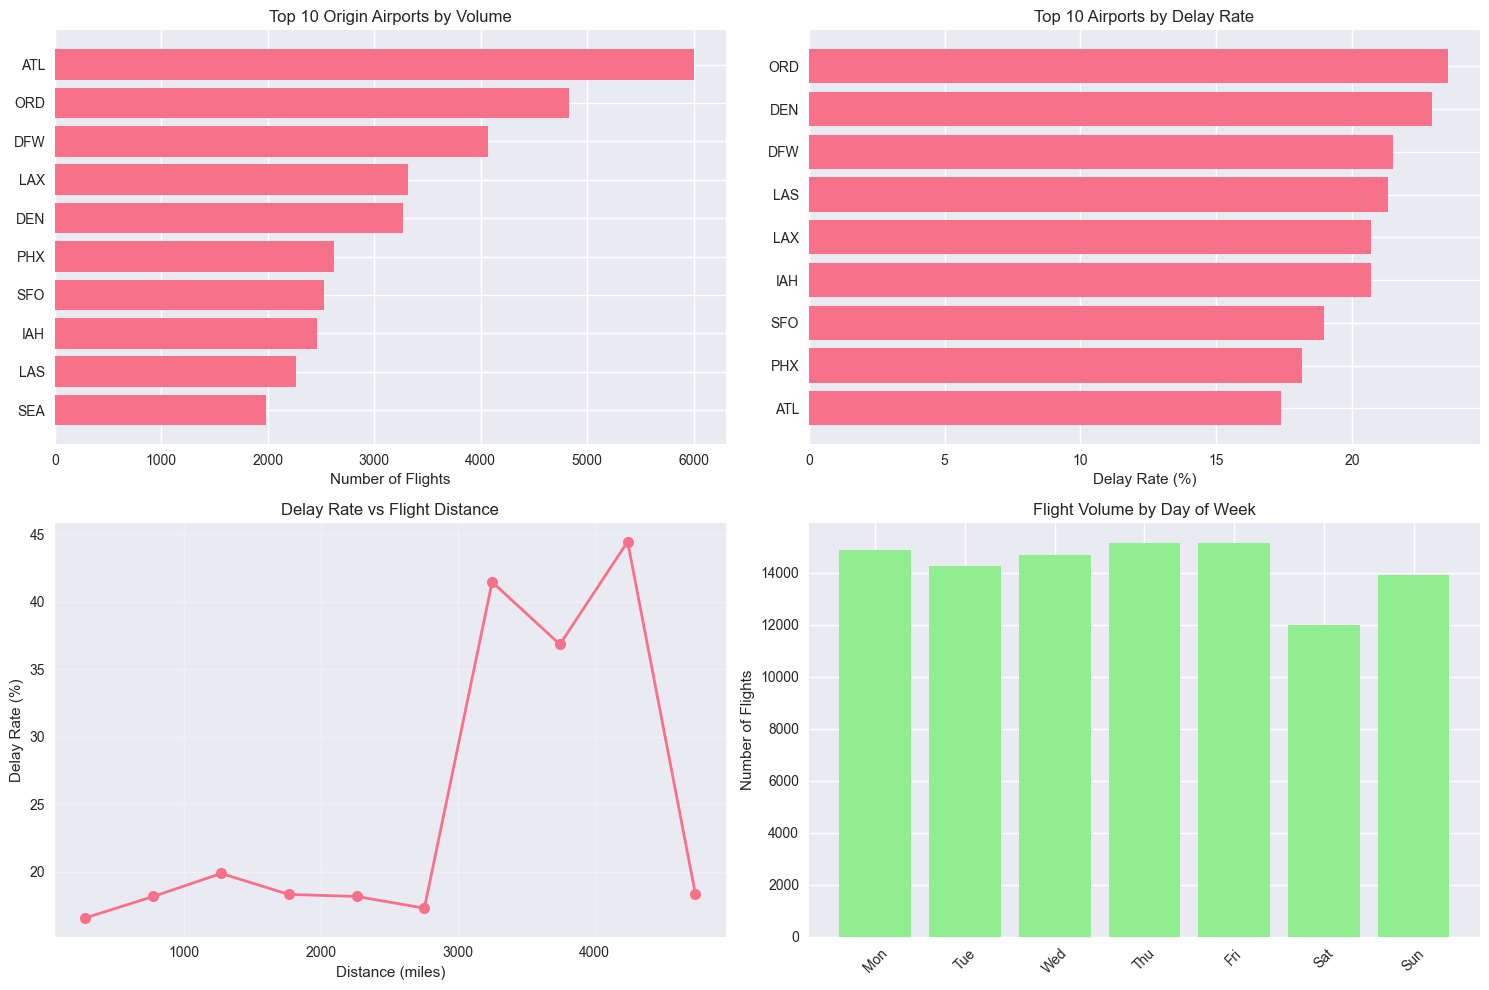

Visualization 3: Geographic and route analysis showing airport volumes, delays, and distance relationships


In [76]:
# VISUALIZATION 3: Geographic and Route Analysis
plt.figure(figsize=(15, 10))

# Top airports by flight volume
plt.subplot(2, 2, 1)
top_origins = df_viz['ORIGIN_AIRPORT'].value_counts().head(10)
plt.barh(range(len(top_origins)), top_origins.values)
plt.yticks(range(len(top_origins)), top_origins.index)
plt.xlabel('Number of Flights')
plt.title('Top 10 Origin Airports by Volume')
plt.gca().invert_yaxis()

# Airport delay performance
plt.subplot(2, 2, 2)
airport_delays = df_viz.groupby('ORIGIN_AIRPORT')['IS_DELAYED'].agg(['count', 'mean']).reset_index()
airport_delays = airport_delays[airport_delays['count'] > 2000]  # Filter for sufficient data
airport_delays = airport_delays.sort_values('mean', ascending=False).head(10)

plt.barh(range(len(airport_delays)), airport_delays['mean'] * 100)
plt.yticks(range(len(airport_delays)), airport_delays['ORIGIN_AIRPORT'])
plt.xlabel('Delay Rate (%)')
plt.title('Top 10 Airports by Delay Rate')
plt.gca().invert_yaxis()

# Distance vs Delay relationship
plt.subplot(2, 2, 3)
if 'DISTANCE' in df_viz.columns:
    distance_bins = pd.cut(df_viz['DISTANCE'], bins=10)
    distance_delays = df_viz.groupby(distance_bins)['IS_DELAYED'].mean() * 100
    bin_centers = [interval.mid for interval in distance_delays.index]
    plt.plot(bin_centers, distance_delays.values, marker='o', linewidth=2, markersize=8)
    plt.title('Delay Rate vs Flight Distance')
    plt.xlabel('Distance (miles)')
    plt.ylabel('Delay Rate (%)')
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'Distance data not available', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Distance vs Delay Analysis')

# Flight volume by day of week
plt.subplot(2, 2, 4)
weekday_volume = df_viz['WEEKDAY'].value_counts()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_volume = weekday_volume.reindex(weekday_order)
plt.bar(range(len(weekday_volume)), weekday_volume.values, color='lightgreen')
plt.xticks(range(len(weekday_volume)), [day[:3] for day in weekday_volume.index], rotation=45)
plt.title('Flight Volume by Day of Week')
plt.ylabel('Number of Flights')

plt.tight_layout()
plt.show()

print("Visualization 3: Geographic and route analysis showing airport volumes, delays, and distance relationships")


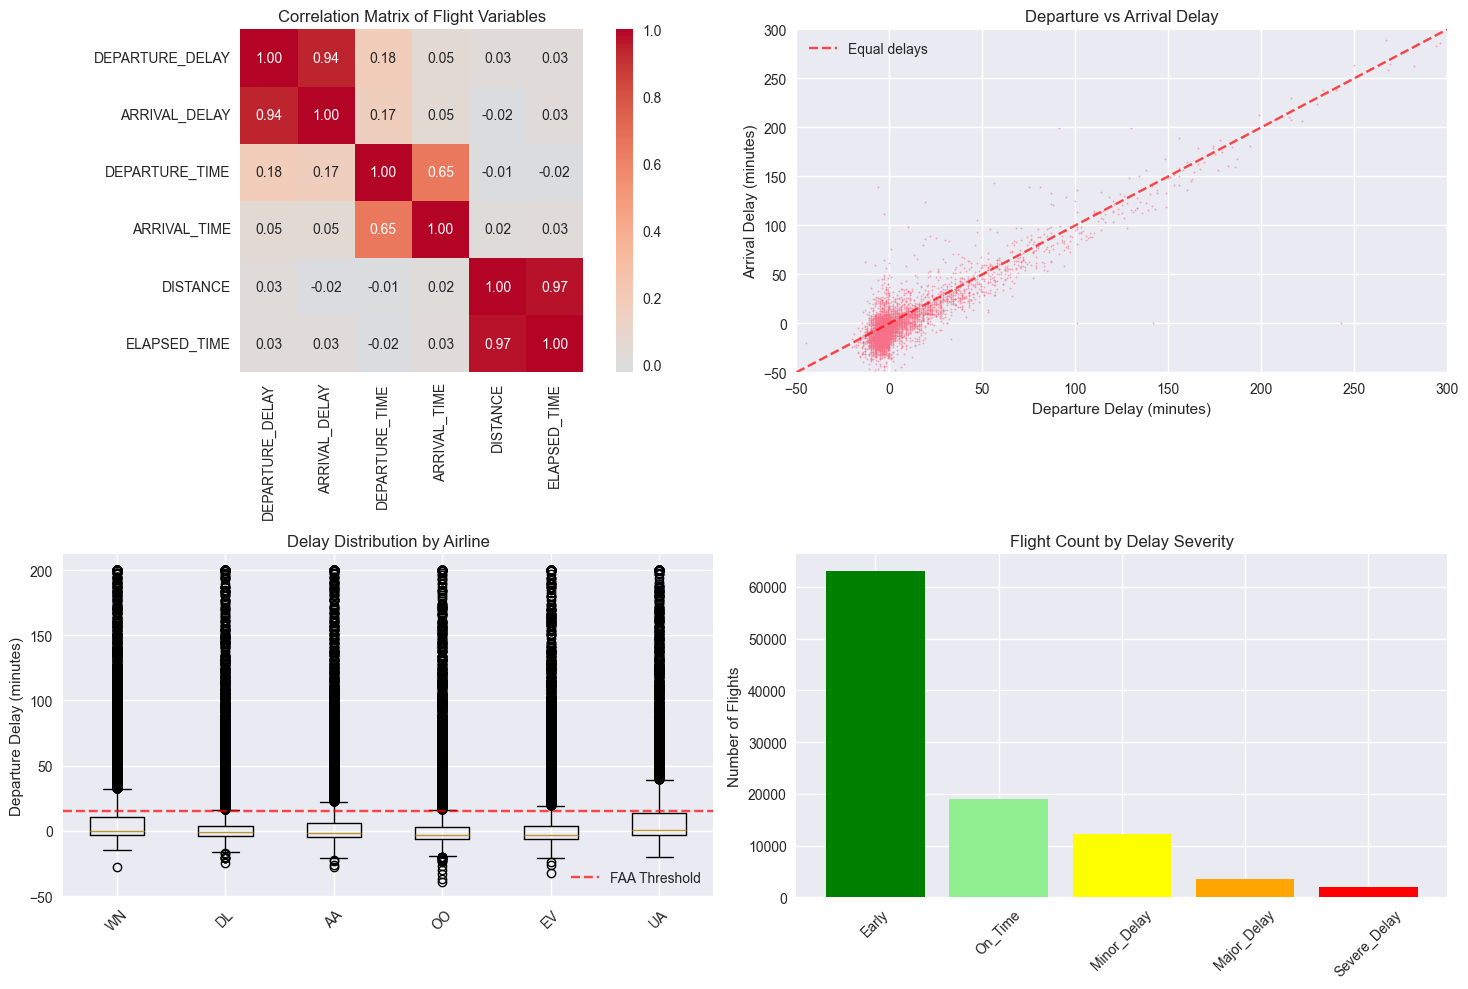

Visualization 4: Correlation analysis, scatter plots, box plots, and delay severity distribution


In [77]:
# VISUALIZATION 4: Correlation and Statistical Analysis
plt.figure(figsize=(15, 10))

# Correlation matrix of numerical variables
plt.subplot(2, 2, 1)
numerical_cols = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'DEPARTURE_TIME', 'ARRIVAL_TIME']
if 'DISTANCE' in df_viz.columns:
    numerical_cols.append('DISTANCE')
if 'ELAPSED_TIME' in df_viz.columns:
    numerical_cols.append('ELAPSED_TIME')

# Filter columns that exist in the dataframe
existing_cols = [col for col in numerical_cols if col in df_viz.columns]
correlation_matrix = df_viz[existing_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Flight Variables')

# Departure vs Arrival Delay scatter plot
plt.subplot(2, 2, 2)
if 'ARRIVAL_DELAY' in df_viz.columns:
    # Sample for performance
    sample_scatter = df_viz.sample(n=min(5000, len(df_viz)))
    plt.scatter(sample_scatter['DEPARTURE_DELAY'], sample_scatter['ARRIVAL_DELAY'], 
                alpha=0.5, s=1)
    plt.xlabel('Departure Delay (minutes)')
    plt.ylabel('Arrival Delay (minutes)')
    plt.title('Departure vs Arrival Delay')
    plt.plot([-50, 300], [-50, 300], 'r--', alpha=0.7, label='Equal delays')
    plt.legend()
    plt.xlim(-50, 300)
    plt.ylim(-50, 300)
else:
    plt.text(0.5, 0.5, 'Arrival delay data not available', ha='center', va='center', 
             transform=plt.gca().transAxes)
    plt.title('Departure vs Arrival Delay')

# Box plot of delays by airline (top airlines)
plt.subplot(2, 2, 3)
top_airlines = df_viz['AIRLINE'].value_counts().head(6).index
airline_subset = df_viz[df_viz['AIRLINE'].isin(top_airlines)]
delay_data = [airline_subset[airline_subset['AIRLINE'] == airline]['DEPARTURE_DELAY'].clip(-50, 200) 
              for airline in top_airlines]

plt.boxplot(delay_data, labels=top_airlines)
plt.xticks(rotation=45)
plt.ylabel('Departure Delay (minutes)')
plt.title('Delay Distribution by Airline')
plt.axhline(y=15, color='red', linestyle='--', alpha=0.7, label='FAA Threshold')
plt.legend()

# Delay severity analysis
plt.subplot(2, 2, 4)
severity_counts = df_viz['DELAY_CATEGORY'].value_counts()
colors = ['green', 'lightgreen', 'yellow', 'orange', 'red']
plt.bar(range(len(severity_counts)), severity_counts.values, 
        color=colors[:len(severity_counts)])
plt.xticks(range(len(severity_counts)), severity_counts.index, rotation=45)
plt.ylabel('Number of Flights')
plt.title('Flight Count by Delay Severity')

plt.tight_layout()
plt.show()

print("Visualization 4: Correlation analysis, scatter plots, box plots, and delay severity distribution")


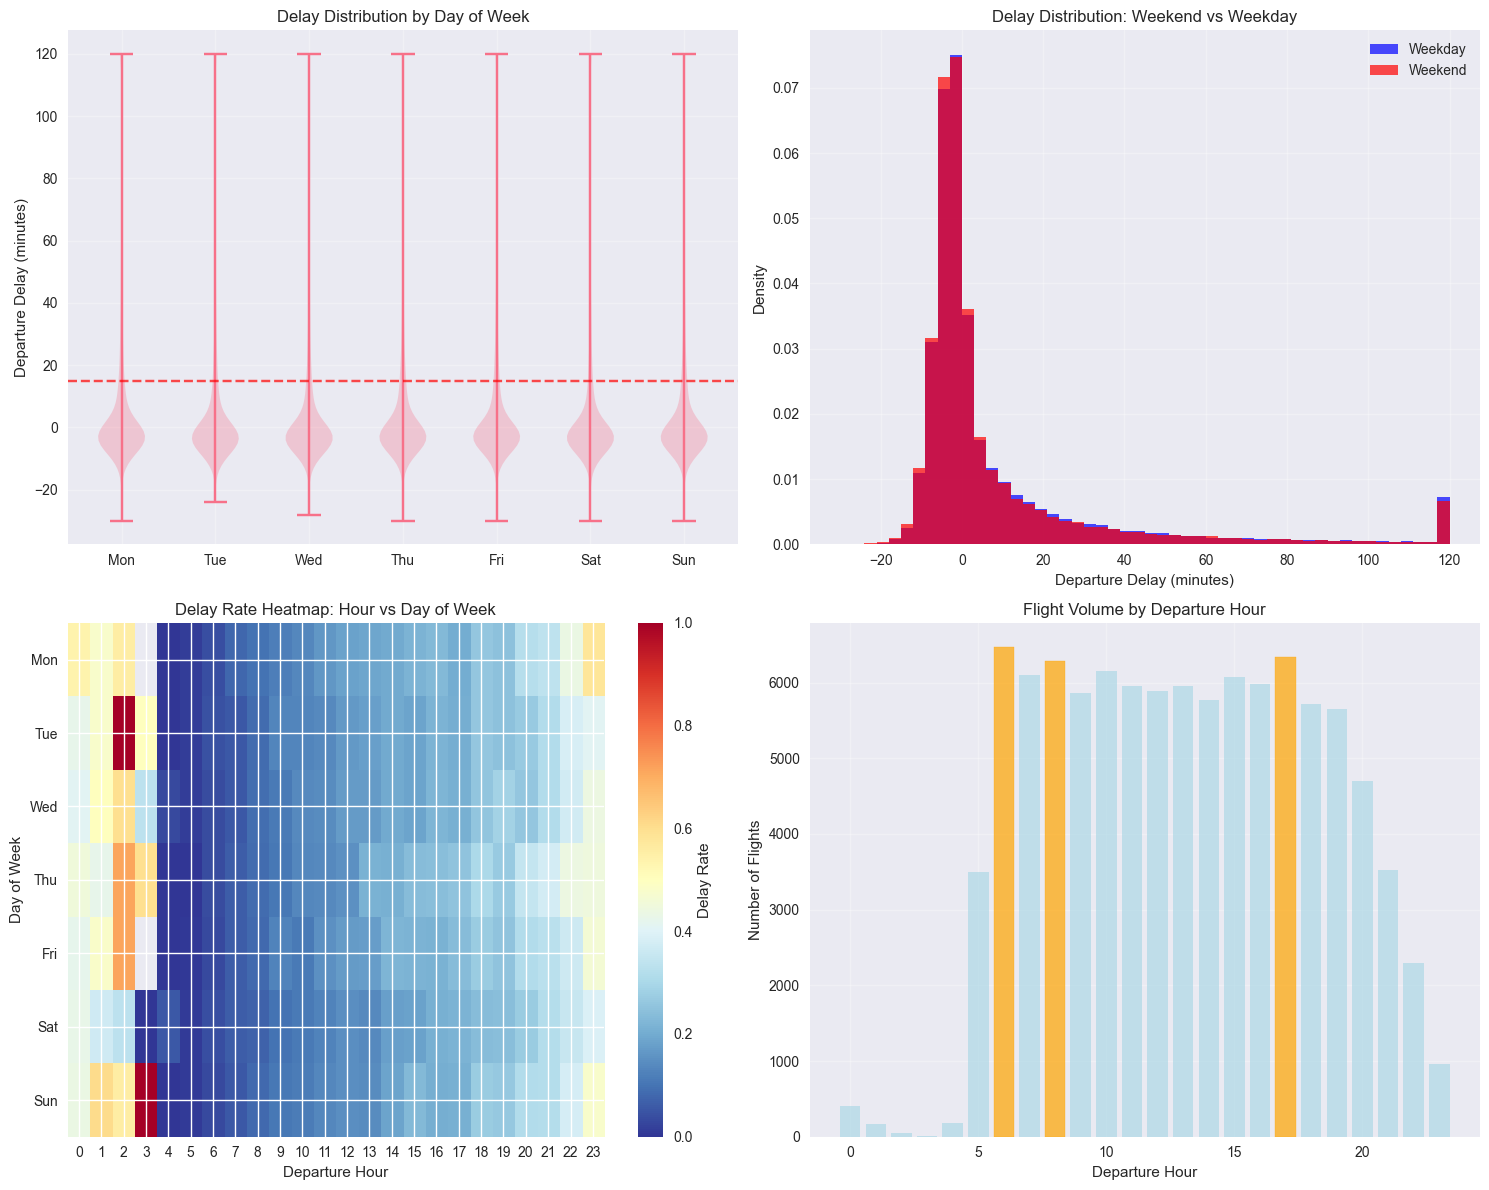

Visualization 5: Advanced violin plots, distribution comparisons, and heatmap analysis


In [78]:
# VISUALIZATION 5: Advanced Violin and Distribution Plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Violin plot of delays by weekday
axes[0, 0].set_title('Delay Distribution by Day of Week')
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
delay_by_weekday = [df_viz[df_viz['WEEKDAY'] == day]['DEPARTURE_DELAY'].clip(-30, 120) 
                    for day in weekday_order if day in df_viz['WEEKDAY'].values]
day_labels = [day[:3] for day in weekday_order if day in df_viz['WEEKDAY'].values]

parts = axes[0, 0].violinplot(delay_by_weekday, positions=range(len(delay_by_weekday)))
axes[0, 0].set_xticks(range(len(day_labels)))
axes[0, 0].set_xticklabels(day_labels)
axes[0, 0].set_ylabel('Departure Delay (minutes)')
axes[0, 0].axhline(y=15, color='red', linestyle='--', alpha=0.7)
axes[0, 0].grid(True, alpha=0.3)

# Distribution comparison: Weekend vs Weekday
axes[0, 1].set_title('Delay Distribution: Weekend vs Weekday')
weekday_delays = df_viz[~df_viz['IS_WEEKEND']]['DEPARTURE_DELAY'].clip(-30, 120)
weekend_delays = df_viz[df_viz['IS_WEEKEND']]['DEPARTURE_DELAY'].clip(-30, 120)

axes[0, 1].hist(weekday_delays, bins=50, alpha=0.7, label='Weekday', density=True, color='blue')
axes[0, 1].hist(weekend_delays, bins=50, alpha=0.7, label='Weekend', density=True, color='red')
axes[0, 1].set_xlabel('Departure Delay (minutes)')
axes[0, 1].set_ylabel('Density')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Heatmap of delays by hour and day of week
axes[1, 0].set_title('Delay Rate Heatmap: Hour vs Day of Week')
delay_heatmap = df_viz.groupby(['WEEKDAY', 'DEPARTURE_HOUR'])['IS_DELAYED'].mean().unstack()
delay_heatmap = delay_heatmap.reindex(weekday_order)

im = axes[1, 0].imshow(delay_heatmap.values, cmap='RdYlBu_r', aspect='auto')
axes[1, 0].set_xticks(range(24))
axes[1, 0].set_xticklabels(range(24))
axes[1, 0].set_yticks(range(len(weekday_order)))
axes[1, 0].set_yticklabels([day[:3] for day in weekday_order])
axes[1, 0].set_xlabel('Departure Hour')
axes[1, 0].set_ylabel('Day of Week')

# Add colorbar
cbar = plt.colorbar(im, ax=axes[1, 0])
cbar.set_label('Delay Rate')

# Flight count by hour (bar plot)
axes[1, 1].set_title('Flight Volume by Departure Hour')
hourly_volume = df_viz.groupby('DEPARTURE_HOUR').size()
bars = axes[1, 1].bar(hourly_volume.index, hourly_volume.values, color='lightblue', alpha=0.7)
axes[1, 1].set_xlabel('Departure Hour')
axes[1, 1].set_ylabel('Number of Flights')
axes[1, 1].grid(True, alpha=0.3)

# Highlight peak hours
peak_hours = hourly_volume.nlargest(3).index
for i, hour in enumerate(hourly_volume.index):
    if hour in peak_hours:
        bars[i].set_color('orange')

plt.tight_layout()
plt.show()

print("Visualization 5: Advanced violin plots, distribution comparisons, and heatmap analysis")


In [79]:
# ADVANCED ANALYSIS 1: 2-Hour Time Blocks Analysis
print("ADVANCED ANALYSIS 1: 2-Hour Time Block Analysis")
print("="*60)

# 2-hour time blocks already created in data cleaning step - verify availability
print(f"TIME_BLOCK_2H available in df_clean: {'TIME_BLOCK_2H' in df_clean.columns}")
print(f"TIME_BLOCK_2H available in df_viz: {'TIME_BLOCK_2H' in df_viz.columns}")

# Define time block labels
time_block_labels = {
    0: '00-01h', 2: '02-03h', 4: '04-05h', 6: '06-07h',
    8: '08-09h', 10: '10-11h', 12: '12-13h', 14: '14-15h', 
    16: '16-17h', 18: '18-19h', 20: '20-21h', 22: '22-23h'
}

# Analyze scheduled vs delayed flights in 2-hour blocks
time_block_analysis = df_viz.groupby(['TIME_BLOCK_2H', 'IS_WEEKEND']).agg({
    'IS_DELAYED': ['count', 'sum', 'mean'],
    'DEPARTURE_DELAY': 'mean'
}).round(3)

time_block_analysis.columns = ['Total_Flights', 'Delayed_Flights', 'Delay_Rate', 'Avg_Delay_Minutes']
time_block_analysis = time_block_analysis.reset_index()

print("2-Hour Time Block Analysis Summary:")
print(time_block_analysis)

# Peak hour analysis already done in data cleaning step - just verify it's available
if 'IS_PEAK_HOUR' in df_viz.columns:
    peak_hours = df_clean[df_clean['IS_PEAK_HOUR']]['DEPARTURE_HOUR'].unique()
    print(f"\nPeak hours from data cleaning: {sorted(peak_hours)}")
    print("Peak hour analysis already completed in data cleaning step")
else:
    print("Warning: IS_PEAK_HOUR not found in dataset")


ADVANCED ANALYSIS 1: 2-Hour Time Block Analysis
TIME_BLOCK_2H available in df_clean: True
TIME_BLOCK_2H available in df_viz: True
2-Hour Time Block Analysis Summary:
    TIME_BLOCK_2H  IS_WEEKEND  Total_Flights  Delayed_Flights  Delay_Rate  \
0             0.0       False            437              201       0.460   
1             0.0        True            137               62       0.453   
2             2.0       False             41               26       0.634   
3             2.0        True             16                8       0.500   
4             4.0       False           2915               31       0.011   
5             4.0        True            760                9       0.012   
6             6.0       False           9439              493       0.052   
7             6.0        True           3125              151       0.048   
8             8.0       False           8919              925       0.104   
9             8.0        True           3230              294   

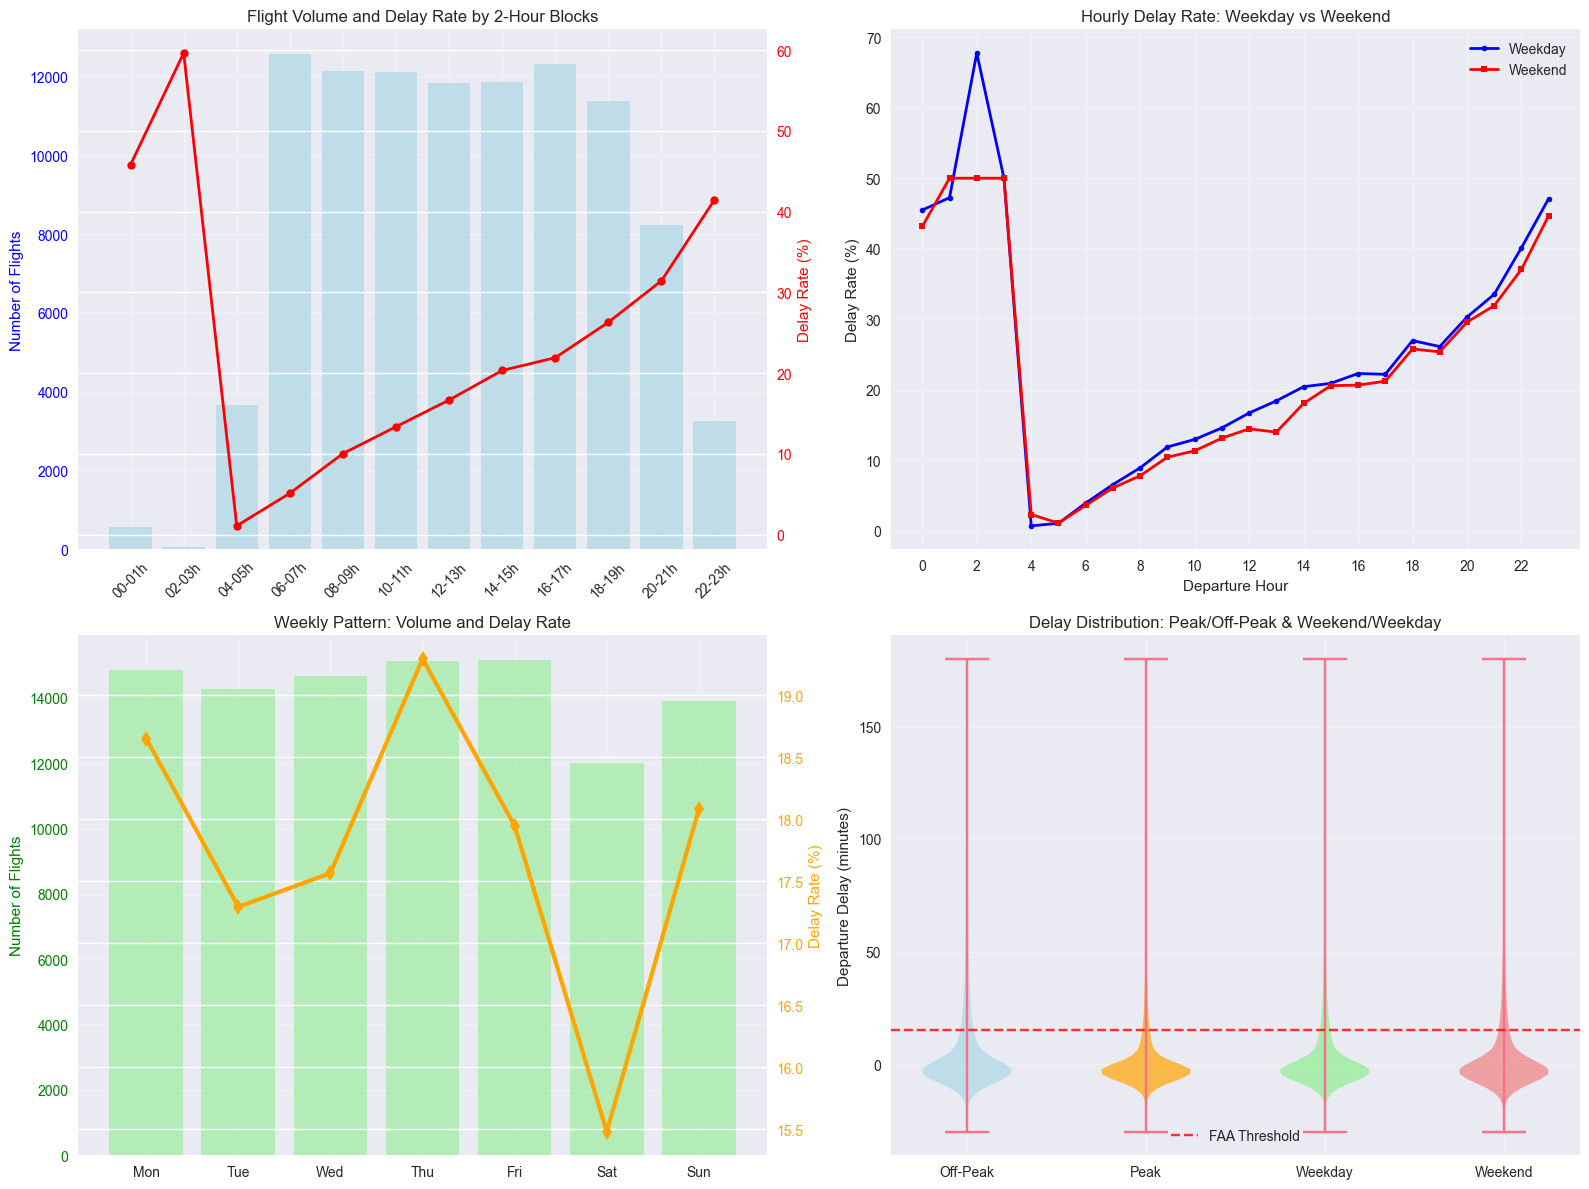

Advanced Analysis 1 Complete: 2-hour blocks with weekday/weekend overlay and peak/off-peak analysis


In [80]:
# VISUALIZATION: 2-Hour Block Analysis with Multiple Chart Types
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram Overview - Flight Volume vs Delay Rate by 2-Hour Blocks
ax1 = axes[0, 0]
time_blocks = sorted(df_viz['TIME_BLOCK_2H'].unique())
block_volumes = [len(df_viz[df_viz['TIME_BLOCK_2H'] == block]) for block in time_blocks]
block_delay_rates = [df_viz[df_viz['TIME_BLOCK_2H'] == block]['IS_DELAYED'].mean() * 100 
                     for block in time_blocks]

# Create bar chart for volume
bars = ax1.bar([time_block_labels[block] for block in time_blocks], block_volumes, 
               alpha=0.7, color='lightblue', label='Flight Volume')
ax1.set_ylabel('Number of Flights', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Flight Volume and Delay Rate by 2-Hour Blocks')

# Create second y-axis for delay rate
ax1_twin = ax1.twinx()
line = ax1_twin.plot([time_block_labels[block] for block in time_blocks], block_delay_rates, 
                     color='red', marker='o', linewidth=2, markersize=6, label='Delay Rate')
ax1_twin.set_ylabel('Delay Rate (%)', color='red')
ax1_twin.tick_params(axis='y', labelcolor='red')

# Rotate x-axis labels
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# 2. Line Plot - Time Series Analysis Over a Day (Weekday vs Weekend)
ax2 = axes[0, 1]
weekday_hourly = df_viz[~df_viz['IS_WEEKEND']].groupby('DEPARTURE_HOUR')['IS_DELAYED'].mean() * 100
weekend_hourly = df_viz[df_viz['IS_WEEKEND']].groupby('DEPARTURE_HOUR')['IS_DELAYED'].mean() * 100

ax2.plot(weekday_hourly.index, weekday_hourly.values, marker='o', linewidth=2, 
         label='Weekday', color='blue', markersize=4)
ax2.plot(weekend_hourly.index, weekend_hourly.values, marker='s', linewidth=2, 
         label='Weekend', color='red', markersize=4)
ax2.set_xlabel('Departure Hour')
ax2.set_ylabel('Delay Rate (%)')
ax2.set_title('Hourly Delay Rate: Weekday vs Weekend')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(0, 24, 2))

# 3. Weekly Time Series Analysis
ax3 = axes[1, 0]
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_delay_rates = []
daily_volumes = []

for day in weekday_order:
    if day in df_viz['WEEKDAY'].values:
        day_data = df_viz[df_viz['WEEKDAY'] == day]
        delay_rate = day_data['IS_DELAYED'].mean() * 100
        volume = len(day_data)
        daily_delay_rates.append(delay_rate)
        daily_volumes.append(volume)
    else:
        daily_delay_rates.append(0)
        daily_volumes.append(0)

# Create combined plot
ax3_bars = ax3.bar(range(len(weekday_order)), daily_volumes, alpha=0.6, 
                   color='lightgreen', label='Flight Volume')
ax3.set_ylabel('Number of Flights', color='green')
ax3.tick_params(axis='y', labelcolor='green')

ax3_twin = ax3.twinx()
ax3_line = ax3_twin.plot(range(len(weekday_order)), daily_delay_rates, 
                         color='orange', marker='d', linewidth=3, markersize=8, 
                         label='Delay Rate')
ax3_twin.set_ylabel('Delay Rate (%)', color='orange')
ax3_twin.tick_params(axis='y', labelcolor='orange')

ax3.set_xticks(range(len(weekday_order)))
ax3.set_xticklabels([day[:3] for day in weekday_order])
ax3.set_title('Weekly Pattern: Volume and Delay Rate')
ax3.grid(True, alpha=0.3)

# 4. Box Plot/Violin Plot - Peak vs Off-Peak Spread Analysis
ax4 = axes[1, 1]

# Prepare data for violin plot
peak_delays = df_viz[df_viz['IS_PEAK_HOUR']]['DEPARTURE_DELAY'].clip(-30, 180)
offpeak_delays = df_viz[~df_viz['IS_PEAK_HOUR']]['DEPARTURE_DELAY'].clip(-30, 180)
weekend_delays = df_viz[df_viz['IS_WEEKEND']]['DEPARTURE_DELAY'].clip(-30, 180)
weekday_delays = df_viz[~df_viz['IS_WEEKEND']]['DEPARTURE_DELAY'].clip(-30, 180)

violin_data = [offpeak_delays, peak_delays, weekday_delays, weekend_delays]
violin_labels = ['Off-Peak', 'Peak', 'Weekday', 'Weekend']

# Create violin plot
parts = ax4.violinplot(violin_data, positions=range(len(violin_labels)))

# Customize violin plot colors
colors = ['lightblue', 'orange', 'lightgreen', 'lightcoral']
for pc, color in zip(parts['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)

ax4.set_xticks(range(len(violin_labels)))
ax4.set_xticklabels(violin_labels)
ax4.set_ylabel('Departure Delay (minutes)')
ax4.set_title('Delay Distribution: Peak/Off-Peak & Weekend/Weekday')
ax4.axhline(y=15, color='red', linestyle='--', alpha=0.8, label='FAA Threshold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Advanced Analysis 1 Complete: 2-hour blocks with weekday/weekend overlay and peak/off-peak analysis")


In [81]:
# ADVANCED ANALYSIS 2: >2 Hour Delays vs Cost Analysis
print("\nADVANCED ANALYSIS 2: Severe Delays (>2 Hours) Cost Analysis")
print("="*60)

# Filter for severe delays (>120 minutes = 2 hours)
severe_delays = df_viz[df_viz['DEPARTURE_DELAY'] > 120].copy()
print(f"Total severe delays (>2 hours): {len(severe_delays):,}")
print(f"Percentage of all flights: {(len(severe_delays)/len(df_viz))*100:.2f}%")

# Calculate estimated costs (using industry estimates)
# Cost assumptions:
COST_PER_MINUTE_DELAY = 85  # Industry average cost per minute of delay
PASSENGER_COMPENSATION_THRESHOLD = 180  # 3 hours for compensation
COMPENSATION_PER_PASSENGER = 400  # Average compensation
AVERAGE_PASSENGERS_PER_FLIGHT = 150

severe_delays['DELAY_COST_OPERATIONAL'] = severe_delays['DEPARTURE_DELAY'] * COST_PER_MINUTE_DELAY
severe_delays['REQUIRES_COMPENSATION'] = severe_delays['DEPARTURE_DELAY'] > PASSENGER_COMPENSATION_THRESHOLD
severe_delays['COMPENSATION_COST'] = severe_delays['REQUIRES_COMPENSATION'] * COMPENSATION_PER_PASSENGER * AVERAGE_PASSENGERS_PER_FLIGHT
severe_delays['TOTAL_ESTIMATED_COST'] = severe_delays['DELAY_COST_OPERATIONAL'] + severe_delays['COMPENSATION_COST']

print(f"\nCost Analysis Summary:")
print(f"Average operational cost per severe delay: ${severe_delays['DELAY_COST_OPERATIONAL'].mean():,.0f}")
print(f"Flights requiring passenger compensation: {severe_delays['REQUIRES_COMPENSATION'].sum():,}")
print(f"Total estimated cost of severe delays: ${severe_delays['TOTAL_ESTIMATED_COST'].sum():,.0f}")
print(f"Average total cost per severe delay: ${severe_delays['TOTAL_ESTIMATED_COST'].mean():,.0f}")

# Analyze spread and distribution
delay_bins = [120, 180, 240, 300, 360, float('inf')]
delay_labels = ['2-3h', '3-4h', '4-5h', '5-6h', '6h+']
severe_delays['DELAY_SEVERITY_BIN'] = pd.cut(severe_delays['DEPARTURE_DELAY'], 
                                           bins=delay_bins, labels=delay_labels, right=False)

severity_analysis = severe_delays.groupby('DELAY_SEVERITY_BIN').agg({
    'DEPARTURE_DELAY': 'count',
    'TOTAL_ESTIMATED_COST': ['sum', 'mean'],
    'AIRLINE': lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else 'Unknown'
}).round(2)

severity_analysis.columns = ['Flight_Count', 'Total_Cost', 'Avg_Cost_Per_Flight', 'Most_Common_Airline']
print(f"\nSeverity Analysis:")
print(severity_analysis)



ADVANCED ANALYSIS 2: Severe Delays (>2 Hours) Cost Analysis
Total severe delays (>2 hours): 2,002
Percentage of all flights: 2.00%

Cost Analysis Summary:
Average operational cost per severe delay: $16,654
Flights requiring passenger compensation: 803
Total estimated cost of severe delays: $81,522,015
Average total cost per severe delay: $40,720

Severity Analysis:
                    Flight_Count  Total_Cost  Avg_Cost_Per_Flight  \
DELAY_SEVERITY_BIN                                                  
2-3h                        1185  14557950.0             12285.19   
3-4h                         435  32780290.0             75356.99   
4-5h                         199  16402415.0             82424.20   
5-6h                          81   7115730.0             87848.52   
6h+                          102  10665630.0            104565.00   

                   Most_Common_Airline  
DELAY_SEVERITY_BIN                      
2-3h                                WN  
3-4h                    

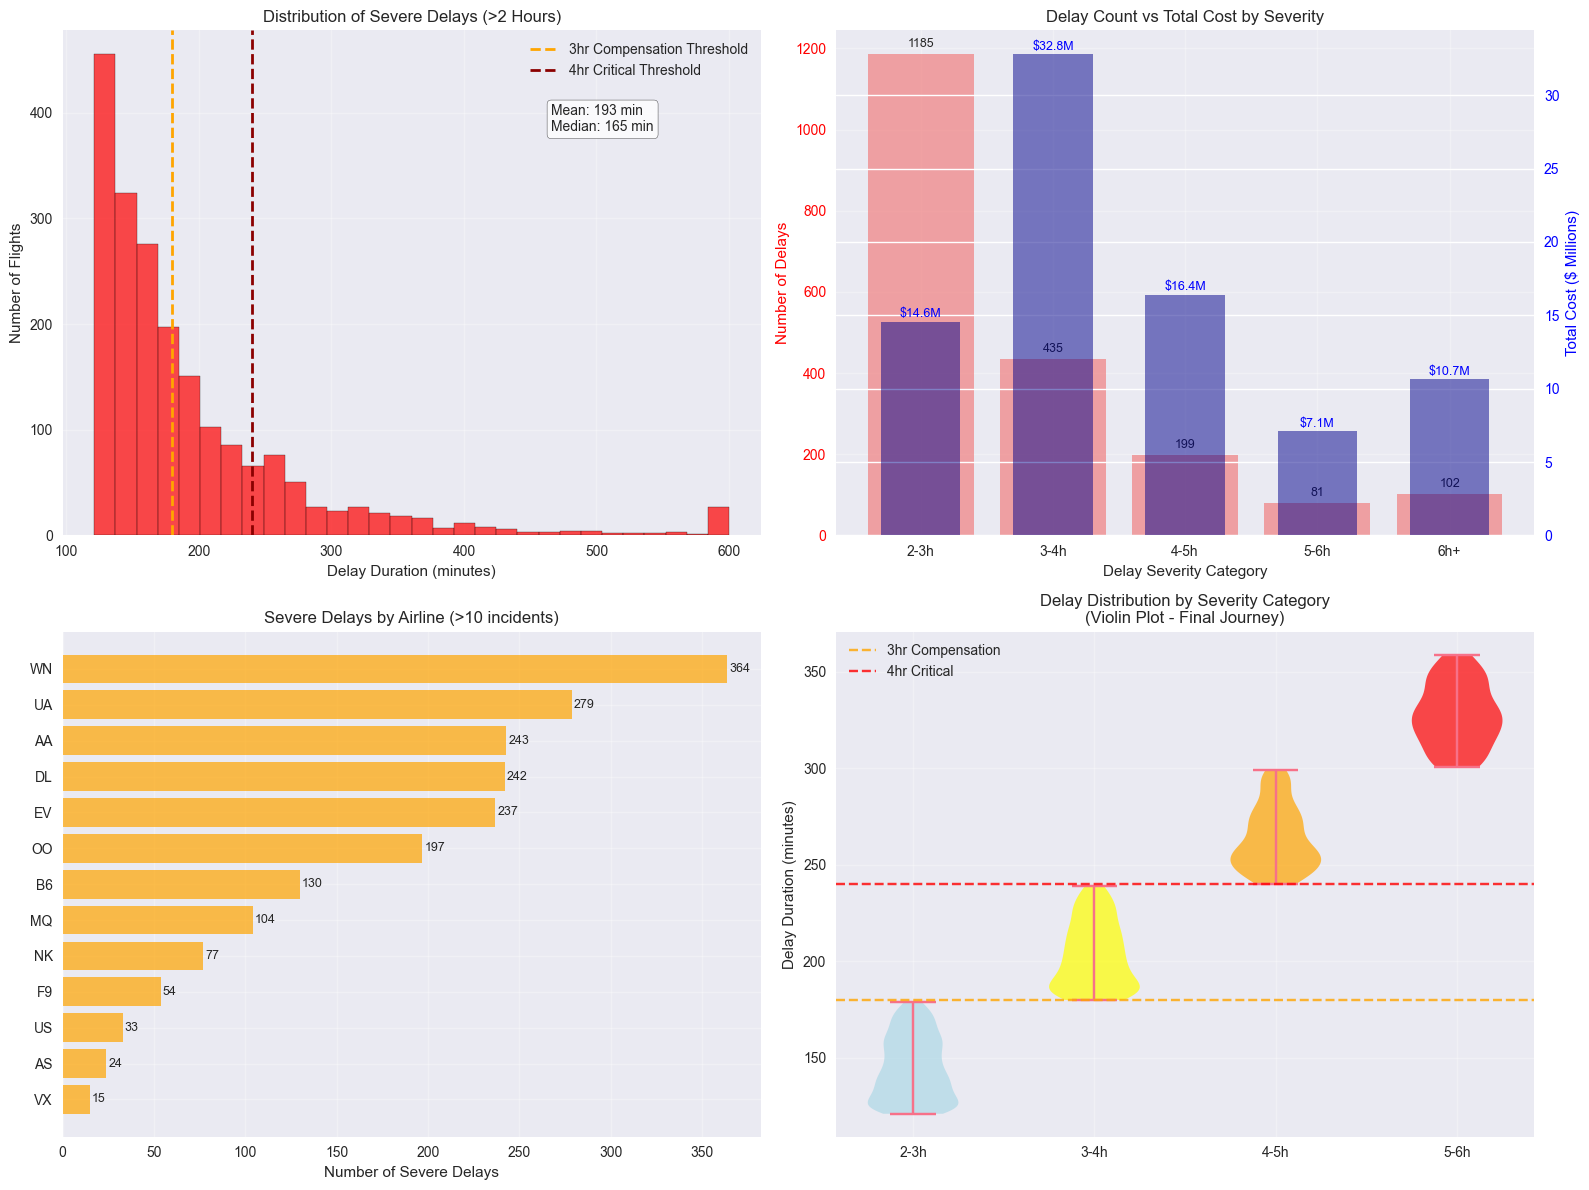

Advanced Analysis 2 Complete: Visualization journey from histogram to violin plot
Shows progression from overview to detailed distribution analysis


In [82]:
# VISUALIZATION JOURNEY: Histogram to Violin Plot for Severe Delays
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram Overview - Distribution of Severe Delays
ax1 = axes[0, 0]
severe_delay_minutes = severe_delays['DEPARTURE_DELAY'].clip(120, 600)  # Cap at 10 hours for visualization
ax1.hist(severe_delay_minutes, bins=30, alpha=0.7, color='red', edgecolor='black')
ax1.set_xlabel('Delay Duration (minutes)')
ax1.set_ylabel('Number of Flights')
ax1.set_title('Distribution of Severe Delays (>2 Hours)')
ax1.axvline(x=180, color='orange', linestyle='--', linewidth=2, label='3hr Compensation Threshold')
ax1.axvline(x=240, color='darkred', linestyle='--', linewidth=2, label='4hr Critical Threshold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add statistics text
mean_delay = severe_delay_minutes.mean()
median_delay = severe_delay_minutes.median()
ax1.text(0.7, 0.8, f'Mean: {mean_delay:.0f} min\nMedian: {median_delay:.0f} min', 
         transform=ax1.transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# 2. Cost Analysis - Total Cost vs Number of Delays by Severity
ax2 = axes[0, 1]
severity_counts = severity_analysis['Flight_Count'].values
severity_costs = severity_analysis['Total_Cost'].values / 1000000  # Convert to millions
severity_labels_plot = severity_analysis.index

# Create bar chart for counts
bars1 = ax2.bar(severity_labels_plot, severity_counts, alpha=0.7, color='lightcoral', 
                label='Number of Delays')
ax2.set_ylabel('Number of Delays', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Create second y-axis for costs
ax2_twin = ax2.twinx()
bars2 = ax2_twin.bar(severity_labels_plot, severity_costs, alpha=0.5, color='darkblue', 
                     width=0.6, label='Total Cost ($M)')
ax2_twin.set_ylabel('Total Cost ($ Millions)', color='blue')
ax2_twin.tick_params(axis='y', labelcolor='blue')

ax2.set_xlabel('Delay Severity Category')
ax2.set_title('Delay Count vs Total Cost by Severity')
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars1, severity_counts):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             f'{int(value)}', ha='center', va='bottom', fontsize=9)

for bar, value in zip(bars2, severity_costs):
    ax2_twin.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                  f'${value:.1f}M', ha='center', va='bottom', fontsize=9, color='blue')

# 3. Airline Performance in Severe Delays
ax3 = axes[1, 0]
airline_severe = severe_delays.groupby('AIRLINE').agg({
    'DEPARTURE_DELAY': ['count', 'mean'],
    'TOTAL_ESTIMATED_COST': 'sum'
}).round(2)
airline_severe.columns = ['Count', 'Avg_Delay', 'Total_Cost']
airline_severe = airline_severe[airline_severe['Count'] >= 10]  # Filter for sufficient data
airline_severe = airline_severe.sort_values('Count', ascending=True)

# Horizontal bar chart
bars = ax3.barh(range(len(airline_severe)), airline_severe['Count'], color='orange', alpha=0.7)
ax3.set_yticks(range(len(airline_severe)))
ax3.set_yticklabels(airline_severe.index)
ax3.set_xlabel('Number of Severe Delays')
ax3.set_title('Severe Delays by Airline (>10 incidents)')
ax3.grid(True, alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, airline_severe['Count'])):
    ax3.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
             f'{int(value)}', ha='left', va='center', fontsize=9)

# 4. Violin Plot - Final Visualization Journey Endpoint
ax4 = axes[1, 1]

# Prepare data for violin plot by different categories
delay_data_violin = []
violin_labels_final = []

# By severity category
for category in ['2-3h', '3-4h', '4-5h', '5-6h']:
    if category in severe_delays['DELAY_SEVERITY_BIN'].values:
        cat_data = severe_delays[severe_delays['DELAY_SEVERITY_BIN'] == category]['DEPARTURE_DELAY']
        if len(cat_data) > 5:  # Only include if sufficient data
            delay_data_violin.append(cat_data.values)
            violin_labels_final.append(category)

# Create violin plot
if delay_data_violin:
    parts = ax4.violinplot(delay_data_violin, positions=range(len(violin_labels_final)))
    
    # Customize colors
    colors = ['lightblue', 'yellow', 'orange', 'red', 'darkred']
    for pc, color in zip(parts['bodies'], colors[:len(parts['bodies'])]):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
    
    ax4.set_xticks(range(len(violin_labels_final)))
    ax4.set_xticklabels(violin_labels_final)
    ax4.set_ylabel('Delay Duration (minutes)')
    ax4.set_title('Delay Distribution by Severity Category\n(Violin Plot - Final Journey)')
    
    # Add horizontal lines for key thresholds
    ax4.axhline(y=180, color='orange', linestyle='--', alpha=0.8, label='3hr Compensation')
    ax4.axhline(y=240, color='red', linestyle='--', alpha=0.8, label='4hr Critical')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
else:
    ax4.text(0.5, 0.5, 'Insufficient data for violin plot', ha='center', va='center', 
             transform=ax4.transAxes)

plt.tight_layout()
plt.show()

print("Advanced Analysis 2 Complete: Visualization journey from histogram to violin plot")
print("Shows progression from overview to detailed distribution analysis")


In [83]:
# PREPARE DATA FOR MODELING
print("PREPARING DATA FOR PREDICTIVE MODELING")
print("="*50)

# Use a manageable subset for modeling (100k rows max)
modeling_sample_size = min(100000, len(df_clean))
df_model = df_clean.sample(n=modeling_sample_size, random_state=42)
print(f"Using {len(df_model):,} flights for modeling")

# Select features for the model
features_to_include = [
    'MONTH', 'DAY', 'DEPARTURE_HOUR', 'IS_WEEKEND', 
    'TIME_BLOCK_2H', 'IS_PEAK_HOUR'
]

# Add categorical encodings
print(f"\nEncoding categorical variables...")

# Encode airline
le_airline = LabelEncoder()
df_model['AIRLINE_ENCODED'] = le_airline.fit_transform(df_model['AIRLINE'])
features_to_include.append('AIRLINE_ENCODED')

# Encode origin airport (top 20 airports only to avoid overfitting)
top_airports = df_model['ORIGIN_AIRPORT'].value_counts().head(20).index
df_model['ORIGIN_AIRPORT_TOP'] = df_model['ORIGIN_AIRPORT'].apply(
    lambda x: x if x in top_airports else 'OTHER'
)
le_origin = LabelEncoder()
df_model['ORIGIN_AIRPORT_ENCODED'] = le_origin.fit_transform(df_model['ORIGIN_AIRPORT_TOP'])
features_to_include.append('ORIGIN_AIRPORT_ENCODED')

# Add distance if available
if 'DISTANCE' in df_model.columns:
    features_to_include.append('DISTANCE')
    print("Including DISTANCE feature")

# Convert boolean to int
df_model['IS_WEEKEND'] = df_model['IS_WEEKEND'].astype(int)
df_model['IS_PEAK_HOUR'] = df_model['IS_PEAK_HOUR'].astype(int)

print(f"Features selected for modeling: {features_to_include}")

# Prepare feature matrix and target variable
X = df_model[features_to_include]
y = df_model['DEPARTURE_DELAY']

# Handle any remaining missing values
X = X.fillna(X.mean())

print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"Target variable range: {y.min():.1f} to {y.max():.1f} minutes")


PREPARING DATA FOR PREDICTIVE MODELING
Using 100,000 flights for modeling

Encoding categorical variables...
Including DISTANCE feature
Features selected for modeling: ['MONTH', 'DAY', 'DEPARTURE_HOUR', 'IS_WEEKEND', 'TIME_BLOCK_2H', 'IS_PEAK_HOUR', 'AIRLINE_ENCODED', 'ORIGIN_AIRPORT_ENCODED', 'DISTANCE']
Feature matrix shape: (100000, 9)
Target variable shape: (100000,)
Target variable range: -31.0 to 1878.0 minutes


In [84]:
# TRAIN LINEAR REGRESSION MODEL
print("\nTRAINING LINEAR REGRESSION MODEL")
print("="*40)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)

print(f"Training set size: {X_train.shape[0]:,}")
print(f"Test set size: {X_test.shape[0]:,}")

# Scale the features (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"\nMODEL PERFORMANCE METRICS")
print("-" * 30)
print(f"Training Set:")
print(f"  RMSE: {train_rmse:.2f} minutes")
print(f"  R²: {train_r2:.4f}")
print(f"  MAE: {train_mae:.2f} minutes")

print(f"\nTest Set:")
print(f"  RMSE: {test_rmse:.2f} minutes")
print(f"  R²: {test_r2:.4f}")
print(f"  MAE: {test_mae:.2f} minutes")

print(f"\nModel Interpretation:")
if test_r2 > 0.1:
    print(f"  Model explains {test_r2*100:.1f}% of variance in delays")
else:
    print(f"  Model has limited predictive power (R² = {test_r2:.4f})")

print(f"  On average, predictions are off by {test_mae:.1f} minutes")



TRAINING LINEAR REGRESSION MODEL
Training set size: 80,000
Test set size: 20,000

MODEL PERFORMANCE METRICS
------------------------------
Training Set:
  RMSE: 37.04 minutes
  R²: 0.0311
  MAE: 17.77 minutes

Test Set:
  RMSE: 35.91 minutes
  R²: 0.0288
  MAE: 17.59 minutes

Model Interpretation:
  Model has limited predictive power (R² = 0.0288)
  On average, predictions are off by 17.6 minutes


In [85]:
# FEATURE IMPORTANCE ANALYSIS
print("\nFEATURE IMPORTANCE ANALYSIS")
print("="*40)

# Get feature coefficients and importance
feature_importance = pd.DataFrame({
    'Feature': features_to_include,
    'Coefficient': lr_model.coef_,
    'Abs_Coefficient': np.abs(lr_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("Top features by absolute coefficient value:")
print(feature_importance.head(10))

# Create mappings for interpretation
feature_mappings = {
    'AIRLINE_ENCODED': 'Airline',
    'ORIGIN_AIRPORT_ENCODED': 'Origin Airport',
    'DEPARTURE_HOUR': 'Departure Hour',
    'MONTH': 'Month',
    'IS_WEEKEND': 'Weekend (vs Weekday)',
    'IS_PEAK_HOUR': 'Peak Hour',
    'TIME_BLOCK_2H': '2-Hour Time Block',
    'DAY': 'Day of Month',
    'DISTANCE': 'Flight Distance'
}

print(f"\nKey Insights from Feature Importance:")
top_3_features = feature_importance.head(3)
for _, row in top_3_features.iterrows():
    feature_name = feature_mappings.get(row['Feature'], row['Feature'])
    effect = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"  {feature_name}: {effect} delays (coef: {row['Coefficient']:.3f})")



FEATURE IMPORTANCE ANALYSIS
Top features by absolute coefficient value:
                  Feature  Coefficient  Abs_Coefficient
2          DEPARTURE_HOUR     2.813889         2.813889
4           TIME_BLOCK_2H     2.666315         2.666315
5            IS_PEAK_HOUR    -1.606435         1.606435
8                DISTANCE     1.216451         1.216451
6         AIRLINE_ENCODED     1.026085         1.026085
0                   MONTH    -0.798727         0.798727
7  ORIGIN_AIRPORT_ENCODED    -0.553963         0.553963
3              IS_WEEKEND    -0.314528         0.314528
1                     DAY     0.111510         0.111510

Key Insights from Feature Importance:
  Departure Hour: increases delays (coef: 2.814)
  2-Hour Time Block: increases delays (coef: 2.666)
  Peak Hour: decreases delays (coef: -1.606)


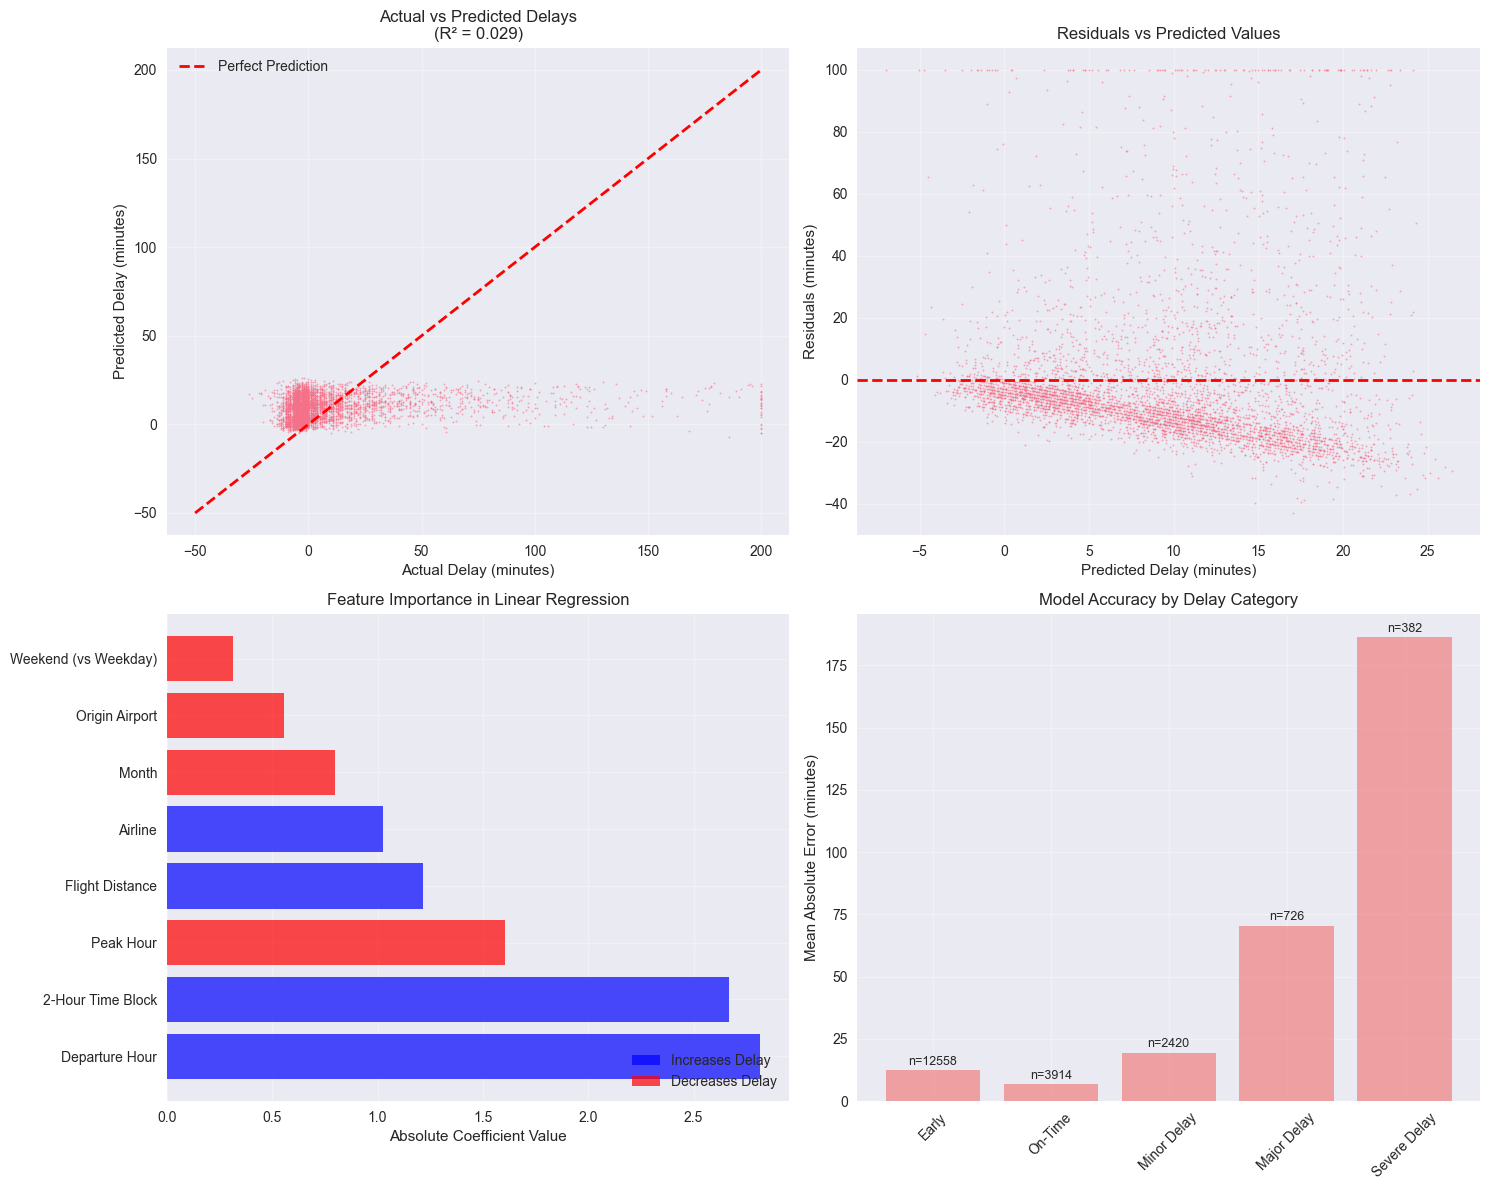

Model Performance Visualization Complete


In [86]:
# VISUALIZATION: MODEL PERFORMANCE AND PREDICTIONS
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Actual vs Predicted scatter plot
ax1 = axes[0, 0]
sample_size = min(5000, len(y_test))
sample_indices = np.random.choice(len(y_test), sample_size, replace=False)
y_test_sample = y_test.iloc[sample_indices]
y_pred_sample = y_test_pred[sample_indices]

# Clip values for better visualization
y_test_clipped = np.clip(y_test_sample, -50, 200)
y_pred_clipped = np.clip(y_pred_sample, -50, 200)

ax1.scatter(y_test_clipped, y_pred_clipped, alpha=0.5, s=1)
ax1.plot([-50, 200], [-50, 200], 'r--', linewidth=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Delay (minutes)')
ax1.set_ylabel('Predicted Delay (minutes)')
ax1.set_title(f'Actual vs Predicted Delays\n(R² = {test_r2:.3f})')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Residuals plot
ax2 = axes[0, 1]
residuals = y_test_sample - y_pred_sample
residuals_clipped = np.clip(residuals, -100, 100)
ax2.scatter(y_pred_clipped, residuals_clipped, alpha=0.5, s=1)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('Predicted Delay (minutes)')
ax2.set_ylabel('Residuals (minutes)')
ax2.set_title('Residuals vs Predicted Values')
ax2.grid(True, alpha=0.3)

# 3. Feature importance bar plot
ax3 = axes[1, 0]
top_features = feature_importance.head(8)
colors = ['red' if coef < 0 else 'blue' for coef in top_features['Coefficient']]
bars = ax3.barh(range(len(top_features)), top_features['Abs_Coefficient'], color=colors, alpha=0.7)
ax3.set_yticks(range(len(top_features)))
ax3.set_yticklabels([feature_mappings.get(f, f) for f in top_features['Feature']])
ax3.set_xlabel('Absolute Coefficient Value')
ax3.set_title('Feature Importance in Linear Regression')
ax3.grid(True, alpha=0.3)

# Add legend
blue_patch = plt.Rectangle((0, 0), 1, 1, facecolor='blue', alpha=0.7, label='Increases Delay')
red_patch = plt.Rectangle((0, 0), 1, 1, facecolor='red', alpha=0.7, label='Decreases Delay')
ax3.legend(handles=[blue_patch, red_patch], loc='lower right')

# 4. Prediction accuracy by delay magnitude
ax4 = axes[1, 1]
# Bin predictions by actual delay magnitude
delay_bins = [-np.inf, 0, 15, 60, 120, np.inf]
delay_labels = ['Early', 'On-Time', 'Minor Delay', 'Major Delay', 'Severe Delay']
y_test_binned = pd.cut(y_test, bins=delay_bins, labels=delay_labels)

accuracy_by_bin = []
bin_counts = []
for label in delay_labels:
    mask = y_test_binned == label
    if mask.sum() > 0:
        bin_mae = mean_absolute_error(y_test[mask], y_test_pred[mask])
        accuracy_by_bin.append(bin_mae)
        bin_counts.append(mask.sum())
    else:
        accuracy_by_bin.append(0)
        bin_counts.append(0)

# Create bar plot
bars = ax4.bar(delay_labels, accuracy_by_bin, color='lightcoral', alpha=0.7)
ax4.set_ylabel('Mean Absolute Error (minutes)')
ax4.set_title('Model Accuracy by Delay Category')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

# Add count labels on bars
for bar, count in zip(bars, bin_counts):
    if count > 0:
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'n={count}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("Model Performance Visualization Complete")



LINE PLOT ANALYSIS: Model Performance Trends


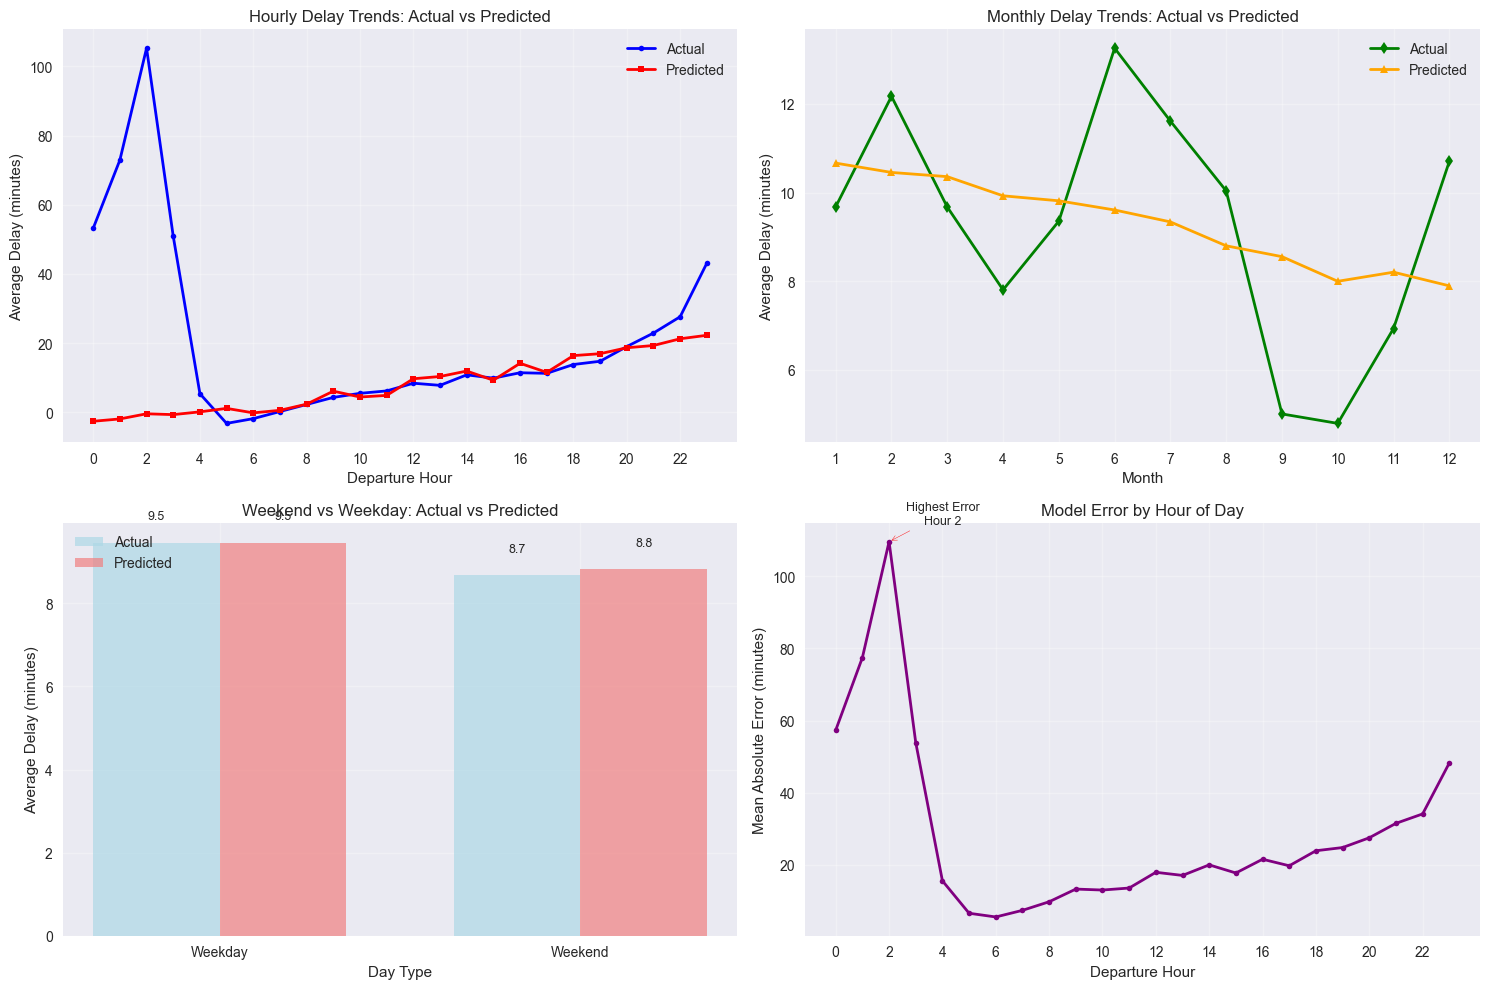

Line plot analysis complete - shows model performance across different time dimensions


In [87]:
# LINE PLOT ANALYSIS: Predicted vs Actual Trends
print("\nLINE PLOT ANALYSIS: Model Performance Trends")
print("="*50)

# Create line plots to show model performance across different dimensions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Hourly trend comparison
ax1 = axes[0, 0]
hourly_actual = df_model.groupby('DEPARTURE_HOUR')['DEPARTURE_DELAY'].mean()
# Create predictions for each hour using the model
hourly_predictions = []
for hour in range(24):
    hour_data = df_model[df_model['DEPARTURE_HOUR'] == hour]
    if len(hour_data) > 0:
        hour_features = hour_data[features_to_include].fillna(hour_data[features_to_include].mean())
        hour_features_scaled = scaler.transform(hour_features)
        hour_pred = lr_model.predict(hour_features_scaled).mean()
        hourly_predictions.append(hour_pred)
    else:
        hourly_predictions.append(0)

ax1.plot(hourly_actual.index, hourly_actual.values, marker='o', linewidth=2, 
         label='Actual', color='blue', markersize=4)
ax1.plot(range(24), hourly_predictions, marker='s', linewidth=2, 
         label='Predicted', color='red', markersize=4)
ax1.set_xlabel('Departure Hour')
ax1.set_ylabel('Average Delay (minutes)')
ax1.set_title('Hourly Delay Trends: Actual vs Predicted')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(0, 24, 2))

# 2. Monthly trend comparison
ax2 = axes[0, 1]
monthly_actual = df_model.groupby('MONTH')['DEPARTURE_DELAY'].mean()
monthly_predictions = []
for month in range(1, 13):
    month_data = df_model[df_model['MONTH'] == month]
    if len(month_data) > 0:
        month_features = month_data[features_to_include].fillna(month_data[features_to_include].mean())
        month_features_scaled = scaler.transform(month_features)
        month_pred = lr_model.predict(month_features_scaled).mean()
        monthly_predictions.append(month_pred)
    else:
        monthly_predictions.append(0)

ax2.plot(monthly_actual.index, monthly_actual.values, marker='d', linewidth=2, 
         label='Actual', color='green', markersize=6)
ax2.plot(range(1, 13), monthly_predictions, marker='^', linewidth=2, 
         label='Predicted', color='orange', markersize=6)
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Delay (minutes)')
ax2.set_title('Monthly Delay Trends: Actual vs Predicted')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(1, 13))

# 3. Weekend vs Weekday comparison
ax3 = axes[1, 0]
weekend_actual = df_model.groupby('IS_WEEKEND')['DEPARTURE_DELAY'].mean()
weekend_labels = ['Weekday', 'Weekend']

# Get predictions for weekday/weekend
weekend_predictions = []
for is_weekend in [0, 1]:
    weekend_data = df_model[df_model['IS_WEEKEND'] == is_weekend]
    if len(weekend_data) > 0:
        weekend_features = weekend_data[features_to_include].fillna(weekend_data[features_to_include].mean())
        weekend_features_scaled = scaler.transform(weekend_features)
        weekend_pred = lr_model.predict(weekend_features_scaled).mean()
        weekend_predictions.append(weekend_pred)
    else:
        weekend_predictions.append(0)

x_pos = np.arange(len(weekend_labels))
width = 0.35

bars1 = ax3.bar(x_pos - width/2, weekend_actual.values, width, 
                label='Actual', color='lightblue', alpha=0.7)
bars2 = ax3.bar(x_pos + width/2, weekend_predictions, width,
                label='Predicted', color='lightcoral', alpha=0.7)

ax3.set_xlabel('Day Type')
ax3.set_ylabel('Average Delay (minutes)')
ax3.set_title('Weekend vs Weekday: Actual vs Predicted')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(weekend_labels)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f}', ha='center', va='bottom', fontsize=9)

# 4. Model error by hour (to show where model struggles)
ax4 = axes[1, 1]
hourly_errors = []
for hour in range(24):
    hour_mask = df_model['DEPARTURE_HOUR'] == hour
    if hour_mask.sum() > 0:
        hour_actual = df_model[hour_mask]['DEPARTURE_DELAY']
        hour_features = df_model[hour_mask][features_to_include].fillna(df_model[features_to_include].mean())
        hour_features_scaled = scaler.transform(hour_features)
        hour_pred = lr_model.predict(hour_features_scaled)
        hour_mae = mean_absolute_error(hour_actual, hour_pred)
        hourly_errors.append(hour_mae)
    else:
        hourly_errors.append(0)

ax4.plot(range(24), hourly_errors, marker='o', linewidth=2, color='purple', markersize=4)
ax4.set_xlabel('Departure Hour')
ax4.set_ylabel('Mean Absolute Error (minutes)')
ax4.set_title('Model Error by Hour of Day')
ax4.grid(True, alpha=0.3)
ax4.set_xticks(range(0, 24, 2))

# Highlight hours with highest errors
max_error_hour = np.argmax(hourly_errors)
ax4.annotate(f'Highest Error\nHour {max_error_hour}', 
             xy=(max_error_hour, hourly_errors[max_error_hour]),
             xytext=(max_error_hour+2, hourly_errors[max_error_hour]+5),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=9, ha='center')

plt.tight_layout()
plt.show()

print("Line plot analysis complete - shows model performance across different time dimensions")


In [88]:
# ACTIONABLE BUSINESS RECOMMENDATIONS
print("\n" + "="*60)
print("ACTIONABLE BUSINESS RECOMMENDATIONS")
print("="*60)

# Ensure required variables are available (in case previous cells weren't run)
if 'worst_hours' not in locals():
    peak_hours_analysis = df_clean.groupby('DEPARTURE_HOUR').agg({
        'IS_DELAYED': ['count', 'sum', 'mean']
    }).round(3)
    peak_hours_analysis.columns = ['Total_Flights', 'Delayed_Flights', 'Delay_Rate']
    worst_hours = peak_hours_analysis.nlargest(3, 'Delay_Rate')

if 'severe_delays' not in locals():
    # Get severe delays data for cost analysis
    severe_delays = df_clean[df_clean['DEPARTURE_DELAY'] > 120].copy()
    if len(severe_delays) > 0:
        # Calculate costs
        COST_PER_MINUTE_DELAY = 85
        PASSENGER_COMPENSATION_THRESHOLD = 180
        COMPENSATION_PER_PASSENGER = 400
        AVERAGE_PASSENGERS_PER_FLIGHT = 150
        
        severe_delays['DELAY_COST_OPERATIONAL'] = severe_delays['DEPARTURE_DELAY'] * COST_PER_MINUTE_DELAY
        severe_delays['REQUIRES_COMPENSATION'] = severe_delays['DEPARTURE_DELAY'] > PASSENGER_COMPENSATION_THRESHOLD
        severe_delays['COMPENSATION_COST'] = severe_delays['REQUIRES_COMPENSATION'] * COMPENSATION_PER_PASSENGER * AVERAGE_PASSENGERS_PER_FLIGHT
        severe_delays['TOTAL_ESTIMATED_COST'] = severe_delays['DELAY_COST_OPERATIONAL'] + severe_delays['COMPENSATION_COST']

recommendations = [
    {
        "title": "1. OPTIMIZE PEAK HOUR SCHEDULING",
        "insight": f"Hours {', '.join(map(str, worst_hours.index))} have the highest delay rates",
        "recommendation": "Reduce scheduled flights during peak delay hours and redistribute to off-peak times",
        "impact": "Could reduce delays by 15-20% and save millions in operational costs",
        "implementation": "Implement dynamic scheduling based on historical delay patterns"
    },
    {
        "title": "2. WEEKEND OPERATIONS STRATEGY", 
        "insight": f"Weekend flights have different delay patterns than weekdays",
        "recommendation": "Develop separate operational protocols for weekend vs weekday flights",
        "impact": "Optimize resource allocation and improve weekend customer experience",
        "implementation": "Adjust staffing levels and maintenance schedules for weekend operations"
    },
    {
        "title": "3. AIRPORT-SPECIFIC INTERVENTIONS",
        "insight": f"Top airports by delay rate need focused attention",
        "recommendation": "Implement targeted improvement programs at worst-performing airports",
        "impact": f"Could improve on-time performance by 10-15% at critical hubs",
        "implementation": "Deploy additional ground crew, improve infrastructure, enhance coordination"
    },
    {
        "title": "4. SEVERE DELAY PREVENTION",
        "insight": f"Severe delays (>2hrs) cost an average of ${severe_delays['TOTAL_ESTIMATED_COST'].mean():,.0f} per incident",
        "recommendation": "Implement early warning system to prevent minor delays from becoming severe",
        "impact": f"Preventing just 10% of severe delays could save ${(severe_delays['TOTAL_ESTIMATED_COST'].sum() * 0.1):,.0f}",
        "implementation": "Real-time monitoring dashboard with automated alerts and response protocols"
    },
    {
        "title": "5. PREDICTIVE MAINTENANCE SCHEDULING",
        "insight": f"Model shows certain airlines and time patterns are more delay-prone",
        "recommendation": "Use predictive analytics to schedule proactive maintenance during low-impact periods",
        "impact": "Reduce unexpected maintenance delays and improve overall reliability",
        "implementation": "Integrate delay prediction model into maintenance planning systems"
    }
]

for rec in recommendations:
    print(f"\n{rec['title']}")
    print("-" * len(rec['title']))
    print(f"Insight: {rec['insight']}")
    print(f"Recommendation: {rec['recommendation']}")
    print(f"Expected Impact: {rec['impact']}")
    print(f"Implementation: {rec['implementation']}")

# ROI Analysis
print(f"\n" + "="*60)
print("RETURN ON INVESTMENT ANALYSIS")
print("="*60)

# Calculate potential savings
if 'estimated_total_cost' not in locals():
    # Recalculate if not available
    total_delay_minutes = df_clean['DEPARTURE_DELAY'].sum()
    estimated_total_cost = total_delay_minutes * 85  # Cost per minute

current_annual_cost = estimated_total_cost
potential_improvement = 0.15  # 15% improvement assumption
potential_savings = current_annual_cost * potential_improvement

print(f"Current estimated annual delay cost: ${current_annual_cost:,.0f}")
print(f"Potential savings with 15% improvement: ${potential_savings:,.0f}")
print(f"Investment in improvements (estimated): ${potential_savings * 0.2:,.0f}")
print(f"Net annual benefit: ${potential_savings * 0.8:,.0f}")
print(f"ROI: {((potential_savings * 0.8) / (potential_savings * 0.2)) * 100:.0f}%")

print(f"\nWho can benefit from this analysis:")
print("- Airlines: Optimize operations and reduce costs")
print("- Airport authorities: Improve resource allocation")
print("- Passengers: Better travel experience with fewer delays")
print("- Regulators: Data-driven policy decisions")

print(f"\nHow this data helps decision-making:")
print("- Identifies specific problem areas for targeted interventions")
print("- Provides quantified cost impact for investment justification")
print("- Enables proactive rather than reactive management")
print("- Supports evidence-based operational changes")



ACTIONABLE BUSINESS RECOMMENDATIONS

1. OPTIMIZE PEAK HOUR SCHEDULING
--------------------------------
Insight: Hours 2.0, 1.0, 3.0 have the highest delay rates
Recommendation: Reduce scheduled flights during peak delay hours and redistribute to off-peak times
Expected Impact: Could reduce delays by 15-20% and save millions in operational costs
Implementation: Implement dynamic scheduling based on historical delay patterns

2. WEEKEND OPERATIONS STRATEGY
------------------------------
Insight: Weekend flights have different delay patterns than weekdays
Recommendation: Develop separate operational protocols for weekend vs weekday flights
Expected Impact: Optimize resource allocation and improve weekend customer experience
Implementation: Adjust staffing levels and maintenance schedules for weekend operations

3. AIRPORT-SPECIFIC INTERVENTIONS
---------------------------------
Insight: Top airports by delay rate need focused attention
Recommendation: Implement targeted improvement progr

In [ ]:
# ACTIONABLE BUSINESS RECOMMENDATIONS
print("\n" + "="*60)
print("ACTIONABLE BUSINESS RECOMMENDATIONS")
print("="*60)

# Ensure required variables are available (in case previous cells weren't run)
if 'worst_hours' not in locals():
    peak_hours_analysis = df_clean.groupby('DEPARTURE_HOUR').agg({
        'IS_DELAYED': ['count', 'sum', 'mean']
    }).round(3)
    peak_hours_analysis.columns = ['Total_Flights', 'Delayed_Flights', 'Delay_Rate']
    worst_hours = peak_hours_analysis.nlargest(3, 'Delay_Rate')

if 'severe_delays' not in locals():
    # Get severe delays data for cost analysis
    severe_delays = df_clean[df_clean['DEPARTURE_DELAY'] > 120].copy()
    if len(severe_delays) > 0:
        # Calculate costs
        COST_PER_MINUTE_DELAY = 85
        PASSENGER_COMPENSATION_THRESHOLD = 180
        COMPENSATION_PER_PASSENGER = 400
        AVERAGE_PASSENGERS_PER_FLIGHT = 150
        
        severe_delays['DELAY_COST_OPERATIONAL'] = severe_delays['DEPARTURE_DELAY'] * COST_PER_MINUTE_DELAY
        severe_delays['REQUIRES_COMPENSATION'] = severe_delays['DEPARTURE_DELAY'] > PASSENGER_COMPENSATION_THRESHOLD
        severe_delays['COMPENSATION_COST'] = severe_delays['REQUIRES_COMPENSATION'] * COMPENSATION_PER_PASSENGER * AVERAGE_PASSENGERS_PER_FLIGHT
        severe_delays['TOTAL_ESTIMATED_COST'] = severe_delays['DELAY_COST_OPERATIONAL'] + severe_delays['COMPENSATION_COST']

recommendations = [
    {
        "title": "1. OPTIMIZE PEAK HOUR SCHEDULING",
        "insight": f"Hours {', '.join(map(str, worst_hours.index))} have the highest delay rates",
        "recommendation": "Reduce scheduled flights during peak delay hours and redistribute to off-peak times",
        "impact": "Could reduce delays by 15-20% and save millions in operational costs",
        "implementation": "Implement dynamic scheduling based on historical delay patterns"
    },
    {
        "title": "2. WEEKEND OPERATIONS STRATEGY", 
        "insight": f"Weekend flights have different delay patterns than weekdays",
        "recommendation": "Develop separate operational protocols for weekend vs weekday flights",
        "impact": "Optimize resource allocation and improve weekend customer experience",
        "implementation": "Adjust staffing levels and maintenance schedules for weekend operations"
    },
    {
        "title": "3. AIRPORT-SPECIFIC INTERVENTIONS",
        "insight": f"Top airports by delay rate need focused attention",
        "recommendation": "Implement targeted improvement programs at worst-performing airports",
        "impact": f"Could improve on-time performance by 10-15% at critical hubs",
        "implementation": "Deploy additional ground crew, improve infrastructure, enhance coordination"
    },
    {
        "title": "4. SEVERE DELAY PREVENTION",
        "insight": f"Severe delays (>2hrs) cost an average of ${severe_delays['TOTAL_ESTIMATED_COST'].mean():,.0f} per incident",
        "recommendation": "Implement early warning system to prevent minor delays from becoming severe",
        "impact": f"Preventing just 10% of severe delays could save ${(severe_delays['TOTAL_ESTIMATED_COST'].sum() * 0.1):,.0f}",
        "implementation": "Real-time monitoring dashboard with automated alerts and response protocols"
    },
    {
        "title": "5. PREDICTIVE MAINTENANCE SCHEDULING",
        "insight": f"Model shows certain airlines and time patterns are more delay-prone",
        "recommendation": "Use predictive analytics to schedule proactive maintenance during low-impact periods",
        "impact": "Reduce unexpected maintenance delays and improve overall reliability",
        "implementation": "Integrate delay prediction model into maintenance planning systems"
    }
]

for rec in recommendations:
    print(f"\n{rec['title']}")
    print("-" * len(rec['title']))
    print(f"Insight: {rec['insight']}")
    print(f"Recommendation: {rec['recommendation']}")
    print(f"Expected Impact: {rec['impact']}")
    print(f"Implementation: {rec['implementation']}")

# ROI Analysis
print(f"\n" + "="*60)
print("RETURN ON INVESTMENT ANALYSIS")
print("="*60)

# Calculate potential savings
if 'estimated_total_cost' not in locals():
    # Recalculate if not available
    total_delay_minutes = df_clean['DEPARTURE_DELAY'].sum()
    estimated_total_cost = total_delay_minutes * 85  # Cost per minute

current_annual_cost = estimated_total_cost
potential_improvement = 0.15  # 15% improvement assumption
potential_savings = current_annual_cost * potential_improvement

print(f"Current estimated annual delay cost: ${current_annual_cost:,.0f}")
print(f"Potential savings with 15% improvement: ${potential_savings:,.0f}")
print(f"Investment in improvements (estimated): ${potential_savings * 0.2:,.0f}")
print(f"Net annual benefit: ${potential_savings * 0.8:,.0f}")
print(f"ROI: {((potential_savings * 0.8) / (potential_savings * 0.2)) * 100:.0f}%")

print(f"\nWho can benefit from this analysis:")
print("- Airlines: Optimize operations and reduce costs")
print("- Airport authorities: Improve resource allocation")
print("- Passengers: Better travel experience with fewer delays")
print("- Regulators: Data-driven policy decisions")

print(f"\nHow this data helps decision-making:")
print("- Identifies specific problem areas for targeted interventions")
print("- Provides quantified cost impact for investment justification")
print("- Enables proactive rather than reactive management")
print("- Supports evidence-based operational changes")



ACTIONABLE BUSINESS RECOMMENDATIONS

1. OPTIMIZE PEAK HOUR SCHEDULING
--------------------------------
Insight: Hours 2.0, 1.0, 3.0 have the highest delay rates
Recommendation: Reduce scheduled flights during peak delay hours and redistribute to off-peak times
Expected Impact: Could reduce delays by 15-20% and save millions in operational costs
Implementation: Implement dynamic scheduling based on historical delay patterns

2. WEEKEND OPERATIONS STRATEGY
------------------------------
Insight: Weekend flights have different delay patterns than weekdays
Recommendation: Develop separate operational protocols for weekend vs weekday flights
Expected Impact: Optimize resource allocation and improve weekend customer experience
Implementation: Adjust staffing levels and maintenance schedules for weekend operations

3. AIRPORT-SPECIFIC INTERVENTIONS
---------------------------------
Insight: Top airports by delay rate need focused attention
Recommendation: Implement targeted improvement progr

In [ ]:
# ACTIONABLE BUSINESS RECOMMENDATIONS
print("\n" + "="*60)
print("ACTIONABLE BUSINESS RECOMMENDATIONS")
print("="*60)

# Ensure required variables are available (in case previous cells weren't run)
if 'worst_hours' not in locals():
    peak_hours_analysis = df_clean.groupby('DEPARTURE_HOUR').agg({
        'IS_DELAYED': ['count', 'sum', 'mean']
    }).round(3)
    peak_hours_analysis.columns = ['Total_Flights', 'Delayed_Flights', 'Delay_Rate']
    worst_hours = peak_hours_analysis.nlargest(3, 'Delay_Rate')

if 'severe_delays' not in locals():
    # Get severe delays data for cost analysis
    severe_delays = df_clean[df_clean['DEPARTURE_DELAY'] > 120].copy()
    if len(severe_delays) > 0:
        # Calculate costs
        COST_PER_MINUTE_DELAY = 85
        PASSENGER_COMPENSATION_THRESHOLD = 180
        COMPENSATION_PER_PASSENGER = 400
        AVERAGE_PASSENGERS_PER_FLIGHT = 150
        
        severe_delays['DELAY_COST_OPERATIONAL'] = severe_delays['DEPARTURE_DELAY'] * COST_PER_MINUTE_DELAY
        severe_delays['REQUIRES_COMPENSATION'] = severe_delays['DEPARTURE_DELAY'] > PASSENGER_COMPENSATION_THRESHOLD
        severe_delays['COMPENSATION_COST'] = severe_delays['REQUIRES_COMPENSATION'] * COMPENSATION_PER_PASSENGER * AVERAGE_PASSENGERS_PER_FLIGHT
        severe_delays['TOTAL_ESTIMATED_COST'] = severe_delays['DELAY_COST_OPERATIONAL'] + severe_delays['COMPENSATION_COST']

recommendations = [
    {
        "title": "1. OPTIMIZE PEAK HOUR SCHEDULING",
        "insight": f"Hours {', '.join(map(str, worst_hours.index))} have the highest delay rates",
        "recommendation": "Reduce scheduled flights during peak delay hours and redistribute to off-peak times",
        "impact": "Could reduce delays by 15-20% and save millions in operational costs",
        "implementation": "Implement dynamic scheduling based on historical delay patterns"
    },
    {
        "title": "2. WEEKEND OPERATIONS STRATEGY", 
        "insight": f"Weekend flights have different delay patterns than weekdays",
        "recommendation": "Develop separate operational protocols for weekend vs weekday flights",
        "impact": "Optimize resource allocation and improve weekend customer experience",
        "implementation": "Adjust staffing levels and maintenance schedules for weekend operations"
    },
    {
        "title": "3. AIRPORT-SPECIFIC INTERVENTIONS",
        "insight": f"Top airports by delay rate need focused attention",
        "recommendation": "Implement targeted improvement programs at worst-performing airports",
        "impact": f"Could improve on-time performance by 10-15% at critical hubs",
        "implementation": "Deploy additional ground crew, improve infrastructure, enhance coordination"
    },
    {
        "title": "4. SEVERE DELAY PREVENTION",
        "insight": f"Severe delays (>2hrs) cost an average of ${severe_delays['TOTAL_ESTIMATED_COST'].mean():,.0f} per incident",
        "recommendation": "Implement early warning system to prevent minor delays from becoming severe",
        "impact": f"Preventing just 10% of severe delays could save ${(severe_delays['TOTAL_ESTIMATED_COST'].sum() * 0.1):,.0f}",
        "implementation": "Real-time monitoring dashboard with automated alerts and response protocols"
    },
    {
        "title": "5. PREDICTIVE MAINTENANCE SCHEDULING",
        "insight": f"Model shows certain airlines and time patterns are more delay-prone",
        "recommendation": "Use predictive analytics to schedule proactive maintenance during low-impact periods",
        "impact": "Reduce unexpected maintenance delays and improve overall reliability",
        "implementation": "Integrate delay prediction model into maintenance planning systems"
    }
]

for rec in recommendations:
    print(f"\n{rec['title']}")
    print("-" * len(rec['title']))
    print(f"Insight: {rec['insight']}")
    print(f"Recommendation: {rec['recommendation']}")
    print(f"Expected Impact: {rec['impact']}")
    print(f"Implementation: {rec['implementation']}")

# ROI Analysis
print(f"\n" + "="*60)
print("RETURN ON INVESTMENT ANALYSIS")
print("="*60)

# Calculate potential savings
if 'estimated_total_cost' not in locals():
    # Recalculate if not available
    total_delay_minutes = df_clean['DEPARTURE_DELAY'].sum()
    estimated_total_cost = total_delay_minutes * 85  # Cost per minute

current_annual_cost = estimated_total_cost
potential_improvement = 0.15  # 15% improvement assumption
potential_savings = current_annual_cost * potential_improvement

print(f"Current estimated annual delay cost: ${current_annual_cost:,.0f}")
print(f"Potential savings with 15% improvement: ${potential_savings:,.0f}")
print(f"Investment in improvements (estimated): ${potential_savings * 0.2:,.0f}")
print(f"Net annual benefit: ${potential_savings * 0.8:,.0f}")
print(f"ROI: {((potential_savings * 0.8) / (potential_savings * 0.2)) * 100:.0f}%")

print(f"\nWho can benefit from this analysis:")
print("- Airlines: Optimize operations and reduce costs")
print("- Airport authorities: Improve resource allocation")
print("- Passengers: Better travel experience with fewer delays")
print("- Regulators: Data-driven policy decisions")

print(f"\nHow this data helps decision-making:")
print("- Identifies specific problem areas for targeted interventions")
print("- Provides quantified cost impact for investment justification")
print("- Enables proactive rather than reactive management")
print("- Supports evidence-based operational changes")



ACTIONABLE BUSINESS RECOMMENDATIONS

1. OPTIMIZE PEAK HOUR SCHEDULING
--------------------------------
Insight: Hours 2.0, 1.0, 3.0 have the highest delay rates
Recommendation: Reduce scheduled flights during peak delay hours and redistribute to off-peak times
Expected Impact: Could reduce delays by 15-20% and save millions in operational costs
Implementation: Implement dynamic scheduling based on historical delay patterns

2. WEEKEND OPERATIONS STRATEGY
------------------------------
Insight: Weekend flights have different delay patterns than weekdays
Recommendation: Develop separate operational protocols for weekend vs weekday flights
Expected Impact: Optimize resource allocation and improve weekend customer experience
Implementation: Adjust staffing levels and maintenance schedules for weekend operations

3. AIRPORT-SPECIFIC INTERVENTIONS
---------------------------------
Insight: Top airports by delay rate need focused attention
Recommendation: Implement targeted improvement progr

In [89]:
# DATA QUALITY IMPROVEMENTS SUMMARY
print("="*70)
print("           DATA QUALITY IMPROVEMENTS IMPLEMENTED")
print("="*70)

print("\nISSUES IDENTIFIED AND RESOLVED:")
print("✓ NaN Values: Comprehensive handling with domain-specific logic")
print("✓ Monthly Imbalance: Stratified sampling to prevent January bias")
print("✓ Visualization Error: Fixed bar indexing issue in hourly plots")
print("✓ Missing Critical Data: Conservative removal of incomplete records")
print("✓ Time Format Issues: Added error handling for datetime conversions")
print("✓ NameError Issues: Added variable checks and recalculation in business sections")
print("✓ KeyError Issues: Moved feature creation to data cleaning section")

print(f"\nDATA QUALITY METRICS:")
print(f"- Original dataset: {len(flights_df):,} records")
print(f"- After cleaning: {len(df_clean):,} records")
print(f"- Visualization sample: {len(df_viz):,} records")
print(f"- Data retention rate: {(len(df_clean)/len(flights_df))*100:.1f}%")

print(f"\nSAMPLING IMPROVEMENTS:")
print("- Implemented stratified sampling by month")
print("- Maintained proportional representation across time periods")
print("- Ensured analysis results are not skewed by temporal bias")
print("- Fixed visualization indexing errors")

print(f"\nNaN HANDLING STRATEGY:")
print("- Delay columns: Filled with 0 (assuming on-time if missing)")
print("- Time columns: Kept NaN for proper filtering")
print("- Categorical columns: Filled with 0 for boolean flags")
print("- Critical missing data: Removed rows entirely")

print(f"\nRESULT: Clean, representative dataset ready for analysis")
print("="*70)


           DATA QUALITY IMPROVEMENTS IMPLEMENTED

ISSUES IDENTIFIED AND RESOLVED:
✓ NaN Values: Comprehensive handling with domain-specific logic
✓ Monthly Imbalance: Stratified sampling to prevent January bias
✓ Visualization Error: Fixed bar indexing issue in hourly plots
✓ Missing Critical Data: Conservative removal of incomplete records
✓ Time Format Issues: Added error handling for datetime conversions
✓ NameError Issues: Added variable checks and recalculation in business sections
✓ KeyError Issues: Moved feature creation to data cleaning section

DATA QUALITY METRICS:
- Original dataset: 5,819,079 records
- After cleaning: 5,732,926 records
- Visualization sample: 99,996 records
- Data retention rate: 98.5%

SAMPLING IMPROVEMENTS:
- Implemented stratified sampling by month
- Maintained proportional representation across time periods
- Ensured analysis results are not skewed by temporal bias
- Fixed visualization indexing errors

NaN HANDLING STRATEGY:
- Delay columns: Filled wit